# <center>COVID-19 Analysis - Impact on various aspects of life</center>

This report descibes the analysis of COVID-19 situation in India and its impact on different aspects of daily life like mobility in public places, power consumption etc. It also describes the vaccination status of the nation. In this analysis, we have used various data wrangling techniques to handle inconsistencies, calculate summaries and develop insights out of raw data.

## Table of Contents

1. [Reading Data](#read)
    1. [Importing the Libraries](#import)
    2. [Importing the Datasets](#dataset)
    3. [Data Structure](#datastruct)
        1. [COVID Data](#covid)
        2. [Vaccination Data](#vaccine)
        3. [Testing Data](#test)
        4. [Power Consumption](#power)
        5. [Mobility Data](#mobility)
2. [Data Selection](#dataselect)
3. [Analyzing Data](#dataanalyze)
    1. [Data Structure & Types](#dtype)
    2. [Incosistencies Observed](#inconsist)
        1. [Invalid Type](#invalidtype)
        2. [Invalid Data: Whitespaces and Special Characters](#invaliddata)
            1. [Covid Data](#invcovid)
            2. [Testing Data](#invtest)
        3. [Inconsistent Column Names](#invcols)
4. [Data Preprocessing](#preprocess)
    1. [Renaming Columns](#renamecols)
	2. [Detecting and Handling Missing Values](#missing)
	3. [Handling Datatypes](#datatypes)
	4. [Structure of Pre-processed Datasets](#preprocessed)
5. [EDA of COVID-19 Outbreak in India](#edacovid)
	1. [Dropping unusable columns](#ecdropcols)
	2. [Analyzing Daily Trends](#ecanalyzedaily)
	3. [Visualizing Daily Trends](#ecvisualizedaily)
	4. [Analyzing Overall Trend](#ecanalyzeall)
	5. [Analyzing State-Wise Trends](#ecanalyzestate)
		1. [Analyzing the Variables using Colormaps](#eccolormap)
		2. [Top Summaries for the entire Nation](#ectopsum)
	6. [Top 10 Figures & Visualiztions](#ectopten)
		1. [Highest Active Cases](#ecactive)
		2. [Lowest Active Cases](#ecactivelow)
		3. [Highest Number of Deaths](#ecdeaths)
		4. [Highest Number of Confirmed Cases](#ecconfirmed)
6. [EDA of COVID-19 Testing in India](#edatest)
	1. [Handling Null Values](#etnull)
	2. [Visualizing Covid-19 Testing Trends](#etvisualize)
	3. [Visualizing Daily Trends](#etvisualizedaily)
7. [EDA of COVID-19 Vaccination in India](#edavaccine)
	1. [Summary Stats](#evsummary)
	2. [Additional Date Columns](#evdate)
	3. [Visualizing Vaccination Trends](#evtrends)
	4. [Variant-Wise Distribution of Administered Vaccines](#evvariant)
	5. [Month-Wise Analysis of Vaccination](#evmonth)
	6. [Gender-Wise Distribution of Vaccinations](#evgender)
	7. [Month-over-Month Analysis of Gender-wise distribution of Vaccination](#evmom)
	8. [State-Wise Distribution of Vaccination](#evstate)
8. [EDA of Power and Mobility condition in India](#edapowmob)
	1. [Unifying Misspelled Statenames](#epmspell)
	2. [Merging COVID, Mobility & Power Data](#epmmerge)
	3. [Number of Missing Values in Each Variable](#epmmiss)
9. [Research Questions](#research)


## READING DATA <a id='read'></a>

The data is contained in CSV flat files. In this analysis, 5 datasets related to COVID-19 are being analysed.
<table>
    <thead>
        <tr>
            <td style='text-align: center'><b> File </b></td>
            <td style='text-align: center'><b> Description </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: center'>covid_19_india.csv</td>
            <td style='text-align: left'>State-wise COVID-19 Data about Infection Spread</td>
        </tr>
        <tr>
            <td style='text-align: center'>covid_vaccine_statewise.csv</td>
            <td style='text-align: left'>State-wise COVID-19 Vaccine Data</td>
        </tr>
        <tr>
            <td style='text-align: center'>StatewiseTestingDetails.csv</td>
            <td style='text-align: left'>State-wise COVID-19 Testing Data about result of tests</td>
        </tr>
        <tr>
            <td style='text-align: center'>power_consumption.csv</td>
            <td style='text-align: left'>State-wise Power Consumption data during COVID-19 Pandemic</td>
        </tr>
        <tr>
            <td style='text-align: center'>2020_IN_Region_Mobility_Report.csv</td>
            <td style='text-align: left'>State-wise Mobility Data during COVID-19 Pandemic</td>
        </tr>
</table>

### Importing the Libraries <a id='import'></a>

Libraries Used: 
* Pandas
* Numpy
* Matplotlib
* Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Importing Datasets<a id='dataset'></a>

The dataset as mentioned above are all flat files in CSV format.

In [2]:
# COVID Data
covid_df = pd.read_csv("DATA/covid_19_india.csv")

# Vaccine Data
vaccine_df = pd.read_csv("DATA/covid_vaccine_statewise.csv")

# Testing Data
test_df = pd.read_csv("DATA/StatewiseTestingDetails.csv")

# Power Consumption Data
power_df = pd.read_csv("DATA/power_consumption.csv")

# Mobility Data
mobility_df = pd.read_csv("DATA/2020_IN_Region_Mobility_Report.csv")

### Data Structure<a id='datastruct'></a>

#### Covid Dataset<a id='covid'></a>

In [3]:
display(covid_df.head(), covid_df.columns.to_list())

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


['Sno',
 'Date',
 'Time',
 'State/UnionTerritory',
 'ConfirmedIndianNational',
 'ConfirmedForeignNational',
 'Cured',
 'Deaths',
 'Confirmed']

#### Vaccination Dataset<a id='vaccine'></a>

In [4]:
display(vaccine_df.head(), vaccine_df.columns.to_list())

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


['Updated On',
 'State',
 'Total Doses Administered',
 'Total Sessions Conducted',
 'Total Sites ',
 'First Dose Administered',
 'Second Dose Administered',
 'Male(Individuals Vaccinated)',
 'Female(Individuals Vaccinated)',
 'Transgender(Individuals Vaccinated)',
 'Total Covaxin Administered',
 'Total CoviShield Administered',
 'Total Sputnik V Administered',
 'AEFI',
 '18-45 years (Age)',
 '45-60 years (Age)',
 '60+ years (Age)',
 'Total Individuals Vaccinated']

#### Testing Dataset<a id='test'></a>

In [5]:
display(test_df.head(), test_df.columns.to_list())

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


['Date', 'State', 'TotalSamples', 'Negative', 'Positive']

#### Power Consumption Dataset<a id='power'></a>

In [6]:
display(power_df.head(), power_df.columns.to_list())

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02-01-2019 00:00,119.9
1,Haryana,NR,28.450006,77.019991,02-01-2019 00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02-01-2019 00:00,234.1
3,Delhi,NR,28.669993,77.230004,02-01-2019 00:00,85.8
4,UP,NR,27.599981,78.050006,02-01-2019 00:00,313.9


['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage']

#### Mobility Dataset<a id='mobility'></a>

In [7]:
display(mobility_df.head(), mobility_df.columns.to_list())

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-15,1.0,2.0,3.0,3.0,5.0,0.0
1,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-16,2.0,2.0,3.0,2.0,0.0,0.0
2,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-17,-1.0,1.0,3.0,1.0,4.0,0.0
3,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-18,0.0,2.0,4.0,2.0,3.0,0.0
4,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-19,0.0,2.0,1.0,1.0,4.0,1.0


['country_region_code',
 'country_region',
 'sub_region_1',
 'sub_region_2',
 'metro_area',
 'iso_3166_2_code',
 'census_fips_code',
 'place_id',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

## DATA SELECTION<a id='dataselect'></a>

There are a few columns in 4 of the 5 datasets that are not needed in this analysis. So, we are eliminating these columns from the dataframes.

<table>
    <thead>
        <tr>
            <td style='text-align: center'><b> Dataset </b></td>
            <td style='text-align: center'><b> Important Fields </b></td>
            <td style='text-align: center'><b> Description </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: left'> Covid Data </td>
            <td> Date <br/> State/UnionTerritory <br/> ConfirmedIndianNational <br/> ConfirmedForeignNational <br/> 
                 Cured <br/> Deaths <br/> Confirmed
            </td>
            <td style='text-align: left'> Date of recording (YYYY-MM-DD) <br/> State/UnionTerritory in which data was recorded <br/> 
                 Confirmed Cases of Indian Nationals <br/> Confirmed cases of Foriegn Nationals <br/> 
                 Number of people who got cured <br/> Number of Deaths recorded <br/> Total number of Confirmed cases
            </td>
        </tr>
        <tr>
            <td style='text-align: left'> Vaccine Data </td>
            <td> Updated On <br/> State <br/> Total Doses Administered <br/> Male(Individuals Vaccinated) <br/> 
                 Female(Individuals Vaccinated) <br/> Transgender(Individuals Vaccinated) <br/> Total Covaxin Administered 
                 <br/> Total CoviShield Administered <br/> AEFI <br/> 18-45 years (Age) <br/> 45-60 years (Age)
                 <br/> 60+ years (Age) <br/> Total Individuals Vaccinated
            </td>
            <td style='text-align: left'> Data on which data was updated  <br/> State of Data Collection <br/> Number of Total Doses Administered <br/>
                 Number of Male individuals who got Vaccinated <br/> Female individuals Vaccinated <br/> 
                 Transgender individuals Vaccinated <br/> Total Number of Covaxin Doses Administered <br/>
                 Total Number of CoviShield Doses Administered <br/> Any adverse events following immunization witnessed <br/>
                 Number of people belonging to 18-45 years age group <br/> Number of people belonging to 45-60 years Age group
                 <br/> Number of people belonging to 60+ years age group <br/> Total number of Individuals Vaccinated
            </td>
        </tr>
        <tr>
            <td style='text-align: left'> Power Consumption Data </td>
            <td> States <br/> Dates <br/> Usage </td>
            <td style='text-align: left'> State in which data was recorded <br/> Date of data recording/updating <br/> Power Usage </td>
        </tr>
        <tr>
            <td style='text-align: left'> Mobility Data </td>
            <td> sub_region_1 <br/> date <br/> grocery_and_pharmacy_percent_change_from_baseline <br/>
                 parks_percent_change_from_baseline <br/> transit_stations_percent_change_from_baseline <br/>
                 workplaces_percent_change_from_baseline <br/> residential_percent_change_from_baseline
            </td>
            <td style='text-align: left'> State of data collection <br/> Date of data collection <br/> 
                 Percentage change in footfall in Grocery and Pharmacy Stores <br/>
                 Percentage change in footfall in Parks <br/> Percentage change in footfall in Transit Stations <br/>
                 Percentage change in footfall in Workplaces <br/> Percentage change in footfall in residential
            </td>
        </tr>
    </tbody>
</table>
        

In [8]:
# Fields of Importance
covid_fields = [
    'Date',
    'State/UnionTerritory',
    'ConfirmedIndianNational', 
    'ConfirmedForeignNational', 
    'Cured',
    'Deaths', 
    'Confirmed'
]

vaccine_fields = [
    'Updated On',
    'State',
    'Total Doses Administered',
    'Male(Individuals Vaccinated)',
    'Female(Individuals Vaccinated)',
    'Transgender(Individuals Vaccinated)',
    'Total Covaxin Administered',
    'Total CoviShield Administered',
    'AEFI',
    '18-45 years (Age)',
    '45-60 years (Age)',
    '60+ years (Age)',
    'Total Individuals Vaccinated'
]

power_fields = [
    'States',
    'Dates',
    'Usage' 
]

mobility_fields =[
    
    'sub_region_1',
    'date',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline'
]


In [9]:
# Filtering the Fields
covid_df = covid_df.loc[:,covid_fields]
vaccine_df = vaccine_df.loc[:,vaccine_fields]
power_df = power_df.loc[:,power_fields]
mobility_df = mobility_df.loc[:,mobility_fields]

In [10]:
# display(covid_df.head(),
# vaccine_df.head(),
# power_df.head(),
# mobility_df.head())

## ANALYZING DATA<a id='dataanalyze'></a>

### Data Structure and Types<a id='dtype'></a>

In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      16850 non-null  object
 1   State/UnionTerritory      16850 non-null  object
 2   ConfirmedIndianNational   16850 non-null  object
 3   ConfirmedForeignNational  16850 non-null  object
 4   Cured                     16850 non-null  int64 
 5   Deaths                    16850 non-null  int64 
 6   Confirmed                 16850 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 921.6+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15113 entries, 0 to 15112
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15113 non-null  object 
 1   State         15113 non-null  object 
 2   TotalSamples  15113 non-null  float64
 3   Negative      6657 non-null   object 
 4   Positive      5589 non-null   float64
dtypes: float64(2), object(3)
memory usage: 590.5+ KB


In [13]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           6699 non-null   object 
 1   State                                6699 non-null   object 
 2   Total Doses Administered             6364 non-null   float64
 3   Male(Individuals Vaccinated)         6363 non-null   float64
 4   Female(Individuals Vaccinated)       6363 non-null   float64
 5   Transgender(Individuals Vaccinated)  6363 non-null   float64
 6   Total Covaxin Administered           6363 non-null   float64
 7   Total CoviShield Administered        6363 non-null   float64
 8   AEFI                                 4180 non-null   float64
 9   18-45 years (Age)                    4177 non-null   float64
 10  45-60 years (Age)                    4178 non-null   float64
 11  60+ years (Age)               

In [14]:
mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212855 entries, 0 to 212854
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   sub_region_1                                       212534 non-null  object 
 1   date                                               212855 non-null  object 
 2   grocery_and_pharmacy_percent_change_from_baseline  182756 non-null  float64
 3   parks_percent_change_from_baseline                 199904 non-null  float64
 4   transit_stations_percent_change_from_baseline      201674 non-null  float64
 5   workplaces_percent_change_from_baseline            211120 non-null  float64
 6   residential_percent_change_from_baseline           200302 non-null  float64
dtypes: float64(5), object(2)
memory usage: 11.4+ MB


In [15]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   States  16599 non-null  object 
 1   Dates   16599 non-null  object 
 2   Usage   16599 non-null  float64
dtypes: float64(1), object(2)
memory usage: 389.2+ KB


### Inconsistencies Observed<a id='inconsist'></a>

#### Invalid Type<a id='invalidtype'></a>

The date column in every dataset is of type object instead of datetime.

#### Invalid Data: Whitespaces & Special Characters<a id='invaliddata'></a>

The datatype of some numeric columns is object instead of int/float. Thus, checking unique values in each of such columns to identify the issue.

##### COVID Data<a id='invcovid'></a>

In [16]:
# object
print('Unique values in ConfirmedForeignNational Column:\n\n',covid_df['ConfirmedForeignNational'].unique())
print('\nUnique values in ConfirmedIndianNational Column:\n\n',covid_df['ConfirmedIndianNational'].unique())

print('\nWe can observe "-" instead of NaN values which results in Object datatype of column instead of int/float.')

Unique values in ConfirmedForeignNational Column:

 ['0' '1' '2' '14' '3' '9' '7' '11' '10' '8' '6' '-']

Unique values in ConfirmedIndianNational Column:

 ['1' '2' '3' '0' '6' '7' '8' '9' '4' '15' '5' '17' '10' '11' '19' '14'
 '22' '32' '12' '23' '24' '36' '25' '39' '44' '18' '16' '26' '49' '33'
 '60' '13' '28' '45' '64' '21' '29' '71' '30' '37' '87' '86' '41' '101'
 '125' '34' '35' '42' '55' '110' '20' '121' '40' '129' '127' '38' '168'
 '177' '52' '46' '54' '-']

We can observe "-" instead of NaN values which results in Object datatype of column instead of int/float.


##### Testing Data<a id='invtest'></a>

In [17]:
print('Number of whitespaces in "Negative" column :', (test_df['Negative']==' ').sum())

print('There is one space value in this column. Need to remove it to get numeric datatype')

Number of whitespaces in "Negative" column : 1
There is one space value in this column. Need to remove it to get numeric datatype


#### Inconsistent Column Names<a id='invcols'></a>

The __Updated On__ in Testing Data contains date of obervation. Thus, to align it with other datasets, it is needed to be renamed.

Also, __sub_regoin_1__ in Mobility Data provides name of the states of observations thus, needs to be renamed as State. 

## DATA PREPROCESSING<a id='preprocess'></a>

### Renaming Columns<a id='renamecols'></a>

The column names in the datasets are renamed to syncronize the headers of all the datasets. Below is the mapping used:

<table>
    <thead>
        <tr>
            <td style='text-align: center'><b> Dataset Name </b></td>
            <td style='text-align: center'><b> Original Name </b></td>
            <td style='text-align: center'><b> Modified Name </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: center'> Covid Data </td>
            <td> State/UnionTerritory </td>
            <td style='text-align: left'> State </td>
        </tr>
        <tr>
            <td style='text-align: center'> Vaccine Data </td>
            <td> Updated On </td>
            <td style='text-align: left'> Date </td>
        </tr>
        <tr>
            <td style='text-align: center'> Power Consumption Data </td>
            <td> States <br/> Dates <br/> Usage </td>
            <td style='text-align: left'> State <br/> Date <br/> Power_usage </td>
        </tr>
        <tr>
            <td style='text-align: center'> Mobility Data </td>
            <td> sub_region_1 <br/> date </td>
            <td style='text-align: left'> State <br/> Date </td>
        </tr>
    </tbody>
</table>


In [18]:
covid_df.rename(columns = {'State/UnionTerritory' : 'State'}, inplace= True)

vaccine_df.rename(columns = {'Updated On' : 'Date'}, inplace= True)

power_df.rename(columns = {'States':'State',  'Dates' : 'Date', 'Usage':'Power_usage'}, inplace= True)

mobility_df.rename(columns = {'sub_region_1' : 'State',  'date' : 'Date'}, inplace= True)

### Detecting and Handling Missing Values<a id='missed'></a>

The whitespace characters (space' ', dash'-') are eliminated from the dataset by replacing them with Nan Values. This enables to declare the type of a numeric column as int/float instead of object.

<table>
    <thead>
        <tr>
            <td style='text-align: center'><b> Dataset Name </b></td>
            <td style='text-align: center'><b> Column Processed </b></td>
            <td style='text-align: center'><b> Operation </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: center'> Covid Data </td>
            <td> ConfirmedForeignNational <br/> ConfirmedIndianNational </td>
            <td style='text-align: left'> Replaced "-" with numpy.NaN <br/> Replaced "-" with numpy.NaN </td>
        </tr>
        <tr>
            <td style='text-align: center'> Testing Data </td>
            <td> Negative </td>
            <td style='text-align: left'> Replaced " " with numpy.NaN </td>
        </tr>
    </tbody>
</table>

In [19]:
covid_df['ConfirmedForeignNational'] = covid_df['ConfirmedForeignNational'].replace('-', np.NaN)
covid_df['ConfirmedIndianNational'] = covid_df['ConfirmedIndianNational'].replace('-', np.NaN)

In [20]:
test_df['Negative'] = test_df['Negative'].replace(' ', np.NaN)

### Handling Datatypes<a id='datatypes'></a>

The datatypes of some of the columns were modified to optimize the future oprations and performance. The following changes were made in different datasets:

<table>
    <thead>
        <tr>
            <td style='text-align: center'><b> Dataset Name </b></td>
            <td style='text-align: center'><b> Column Name </b></td>
            <td style='text-align: center'><b> Datatype Conversion </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style='text-align: center'> Covid Data </td>
            <td> Date <br/> ConfirmedForeignNational <br/> ConfirmedIndianNational </td>
            <td style='text-align: left'> object => datetime <br/> object => float <br/> object => float </td>
        </tr>
        <tr>
            <td style='text-align: center'> Vaccine Data </td>
            <td> Date </td>
            <td style='text-align: left'> object => datetime </td>
        </tr>
        <tr>
            <td style='text-align: center'> Power Consumption Data </td>
            <td> Date </td>
            <td style='text-align: left'> object => datetime </td>
        </tr>
        <tr>
            <td style='text-align: center'> Testing Data </td>
            <td> Date <br/> Negative </td>
            <td style='text-align: left'> object => datetime <br/> object => float </td>
        </tr>
        <tr>
            <td style='text-align: center'> Mobility Data </td>
            <td> Date </td>
            <td style='text-align: left'> object => datetime </td>
        </tr>
    </tbody>
</table>


In [21]:
# Dates
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'], format ='%d/%m/%Y' )

power_df['Date'] = pd.to_datetime(power_df['Date'], format= '%d/%m/%Y %H:%M:%S')

test_df['Date'] = pd.to_datetime(test_df['Date'], format= '%Y-%m-%d')

mobility_df['Date'] = pd.to_datetime(mobility_df['Date'], format= '%Y-%m-%d')

# Numeric Values
covid_df['ConfirmedForeignNational'] = covid_df['ConfirmedForeignNational'].astype('float')
covid_df['ConfirmedIndianNational'] = covid_df['ConfirmedIndianNational'].astype('float')
test_df['Negative'] = test_df['Negative'].astype('float')

ValueError: time data '02-01-2019 00:00' does not match format '%d/%m/%Y %H:%M:%S' (match)

### Structure of Pre-processed Datasets<a id='preprocessed'></a>

In [ ]:
covid_df.info()

In [ ]:
vaccine_df.info()

In [ ]:
power_df.info()

In [ ]:
test_df.info()

In [22]:
mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212855 entries, 0 to 212854
Data columns (total 7 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   State                                              212534 non-null  object 
 1   Date                                               212855 non-null  object 
 2   grocery_and_pharmacy_percent_change_from_baseline  182756 non-null  float64
 3   parks_percent_change_from_baseline                 199904 non-null  float64
 4   transit_stations_percent_change_from_baseline      201674 non-null  float64
 5   workplaces_percent_change_from_baseline            211120 non-null  float64
 6   residential_percent_change_from_baseline           200302 non-null  float64
dtypes: float64(5), object(2)
memory usage: 11.4+ MB


In [23]:
display(covid_df.head(), vaccine_df.head(), power_df.head(), test_df.head(), mobility_df.head())

,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


,Date,State,Total Doses Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,2021-01-16,India,48276.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,2021-01-17,India,58604.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,2021-01-18,India,99449.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,2021-01-19,India,195525.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,2021-01-20,India,251280.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0


,State,Date,Power_usage
0,Punjab,02-01-2019 00:00,119.9
1,Haryana,02-01-2019 00:00,130.3
2,Rajasthan,02-01-2019 00:00,234.1
3,Delhi,02-01-2019 00:00,85.8
4,UP,02-01-2019 00:00,313.9


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


,State,Date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,2020-02-15,2.0,3.0,3.0,5.0,0.0
1,NaN,2020-02-16,2.0,3.0,2.0,0.0,0.0
2,NaN,2020-02-17,1.0,3.0,1.0,4.0,0.0
3,NaN,2020-02-18,2.0,4.0,2.0,3.0,0.0
4,NaN,2020-02-19,2.0,1.0,1.0,4.0,1.0


## EDA of COVID-19 Outbreak in India<a id='edacovid'></a>

In this section, COVID-19 outbreak in india as being analysed based on number of cases, deaths, cured etc. This provides us an insight into adversely affected states of India, the trends of cured and confiremd individuals over the entire period of time and change in mortality rate caused by the pandemic.

In [24]:
covid_df

,Date,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
16845,2021-07-07,Telangana,NaN,NaN,613124,3703,628282
16846,2021-07-07,Tripura,NaN,NaN,63964,701,68612
16847,2021-07-07,Uttarakhand,NaN,NaN,332006,7338,340882
16848,2021-07-07,Uttar Pradesh,NaN,NaN,1682130,22656,1706818


### Dropping unusable columns<a id='ecdropcols'></a>

The ConfirmedIndianNational and ConfirmedForeignNational columns contain 16404 records with Null Values out of 16850 observations i.e., almost 97% values are missing. Since, we do not have any additional information to determine the distribution of total confirmed cases between these two categories, we have dropped these columns. The main objective is to analyse the number of confirmed cases which are avaailable under Confirmed Column.

In [25]:
covid_df.isnull().sum()

Date                            0
State                           0
ConfirmedIndianNational     16404
ConfirmedForeignNational    16404
Cured                           0
Deaths                          0
Confirmed                       0
dtype: int64

In [26]:
covid_df.drop(['ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1, inplace = True)

After dropping the columns, there is no other column with a NULL value. Thus no further null value handling is needed.

In [27]:
covid_df.isnull().sum()

Date         0
State        0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

The dataset now has 5 varaibles : Date, State, Cured, Deaths, Confirmed and 16850 rows. 
Below is a view of the dataset

In [28]:
# covid_df['Active'] = covid_df['Confirmed'] - (covid_df['Deaths'] + covid_df['Cured'])
covid_df

,Date,State,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
16845,2021-07-07,Telangana,613124,3703,628282
16846,2021-07-07,Tripura,63964,701,68612
16847,2021-07-07,Uttarakhand,332006,7338,340882
16848,2021-07-07,Uttar Pradesh,1682130,22656,1706818


### Analyzing Daily Trends<a id='ecanalyzedaily'></a>

The dataset contains multiple observations for each day corresponding to different states of India. In order to analyse daily trends, the data is agreegated for each day. Also, the data available is cumulative. Thus, to analyse per day COVID-19 cases, cumulative data is transformed into non-cumulative and added as additional columns in the dataset.

Now, the dataset consists of 6 columns:

<table>
    <thead>
        <tr>
            <td style="text-align: left"><b> Column Name </b></td>
            <td style="text-align: right"><b> Column Description </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> Cured_cumsum <td>
            <td> Cumulative sum of Number of Cured Individuals </td>
        </tr>
        <tr>
            <td> Deaths_cumsum <td>
            <td> Cumulative sum of Number of Deaths </td>
        </tr>
        <tr>
            <td> Confirmed_cumsum <td>
            <td> Cumulative sum of Number of Confirmed Cases </td>
        </tr>
        <tr>
            <td> Cured <td>
            <td> Daily sum of Number of Cured Individuals </td>
        </tr>
        <tr>
            <td> Deaths <td>
            <td> Daily sum of Number of Deaths </td>
        </tr>
        <tr>
            <td> Confirmed <td>
            <td> Daily sum of Number of Confirmed Cases </td>
        </tr>
    </tbody>
</table>


In [29]:
covid_time = covid_df.groupby('Date').sum().sort_index()
covid_time_diff = covid_time.diff().fillna(covid_time)
covid_time.rename(columns = {'Cured':'Cured_cumsum','Deaths' : 'Deaths_cumsum','Confirmed': 'Confirmed_cumsum'}, inplace = True)
covid_daily = covid_time.merge(covid_time_diff, how = 'inner', left_index= True, right_index=True)

In [30]:
covid_daily

,Cured_cumsum,Deaths_cumsum,Confirmed_cumsum,Cured,Deaths,Confirmed
Date,,,,,,
2020-01-30,0,0,1,0.0,0.0,1.0
2020-01-31,0,0,1,0.0,0.0,0.0
2020-02-01,0,0,2,0.0,0.0,1.0
2020-02-02,0,0,3,0.0,0.0,1.0
2020-02-03,0,0,3,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-07-03,29605779,401050,30502362,57477.0,738.0,44111.0
2021-07-04,29658078,402005,30545433,52299.0,955.0,43071.0
2021-07-05,29700430,402728,30585229,42352.0,723.0,39796.0


It can be observed that the number of observations are now reduced to 525 i.e., the dataset consists of 17 months of data.

In order to determine the number of Active cases per day, the cumulative data variables are utilized thus, creating a variable of active cases in dataset.

In [31]:
covid_daily['Active'] = covid_daily['Confirmed_cumsum'] - (covid_daily['Deaths_cumsum'] + covid_daily['Cured_cumsum'])
covid_daily

,Cured_cumsum,Deaths_cumsum,Confirmed_cumsum,Cured,Deaths,Confirmed,Active
Date,,,,,,,
2020-01-30,0,0,1,0.0,0.0,1.0,1
2020-01-31,0,0,1,0.0,0.0,0.0,1
2020-02-01,0,0,2,0.0,0.0,1.0,2
2020-02-02,0,0,3,0.0,0.0,1.0,3
2020-02-03,0,0,3,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...
2021-07-03,29605779,401050,30502362,57477.0,738.0,44111.0,495533
2021-07-04,29658078,402005,30545433,52299.0,955.0,43071.0,485350
2021-07-05,29700430,402728,30585229,42352.0,723.0,39796.0,482071


### Visualizing Daily Trends<a id='ecvisualizedaily'></a>

The Daily variation in Number of Confirmed, Active, Cured Cases and Deaths can be observed through below shown Line plots. These are time series plots showing daily variation in number from March 2020 to July 2021.

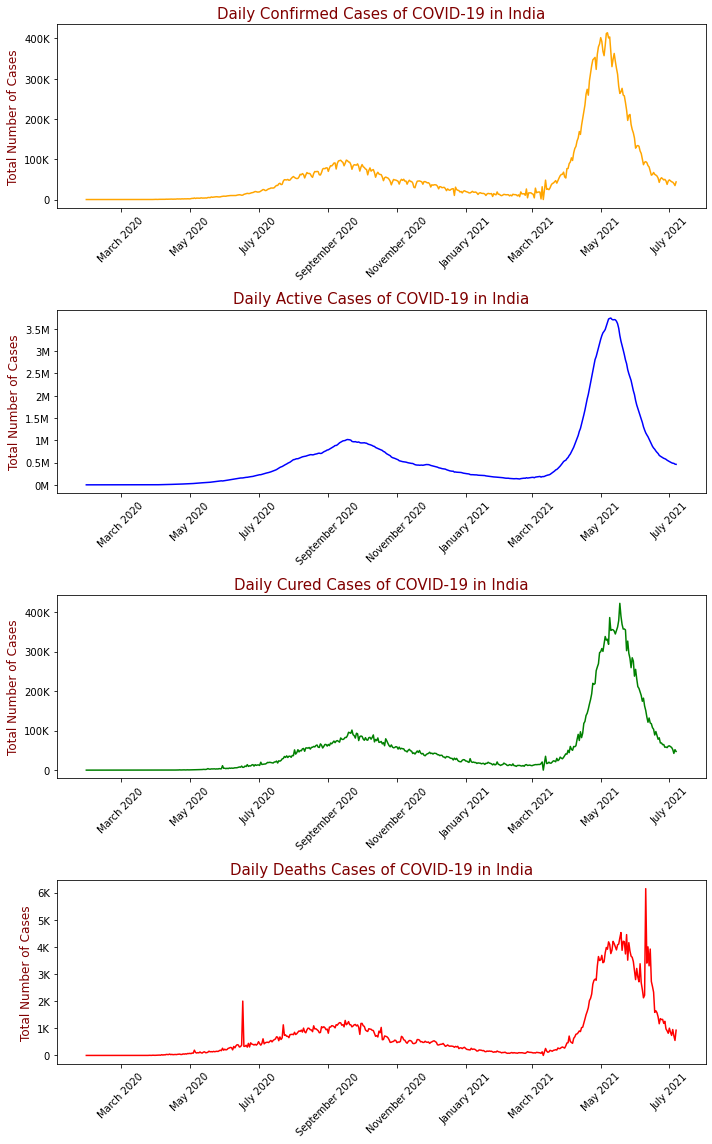

In [32]:
fig = plt.figure(figsize = (10,16))

analysis_cols = {'Confirmed':{'color':'orange',
                              'y-axis': np.arange(5)*100000,
                              'y-ticks': ['0','100K','200K','300K','400K']},
                 'Active'   :{'color':'blue',
                              'y-axis': np.arange(0,4,0.5)*1000000,
                              'y-ticks': ['0M','0.5M','1M','1.5M','2M','2.5M','3M','3.5M']},
                 'Cured'    :{'color':'green',
                              'y-axis': np.arange(5)*100000,
                              'y-ticks': ['0','100K','200K','300K','400K']},
                 'Deaths'   :{'color':'red',
                              'y-axis': np.arange(7)*1000,
                              'y-ticks': ['0','1K','2K','3K','4K', '5K', '6K']}}

for ax, column in zip(fig.subplots(4,1), analysis_cols.keys()):
    ax.plot(covid_daily[column], color = analysis_cols[column]['color'])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
    ax.set_yticks(analysis_cols[column]['y-axis'])
    ax.set_yticklabels(analysis_cols[column]['y-ticks'])
    ax.tick_params(axis='x', labelrotation = 45)
    ax.set_title(f'Daily {column} Cases of COVID-19 in India', fontsize = 15, color = 'maroon')
    ax.set_ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')
    fig.tight_layout()

### Analysing Overall Trend<a id='ecanalyzeall'></a>

The given plot shows the cumulative rise in the Cured and Confirmed Cases. It also shows how the rise in number of deaths compares with total number of cases. It can observed that there were two waves of the virus spread witnessed by nation. One being in July 2020 and next in April 2021.

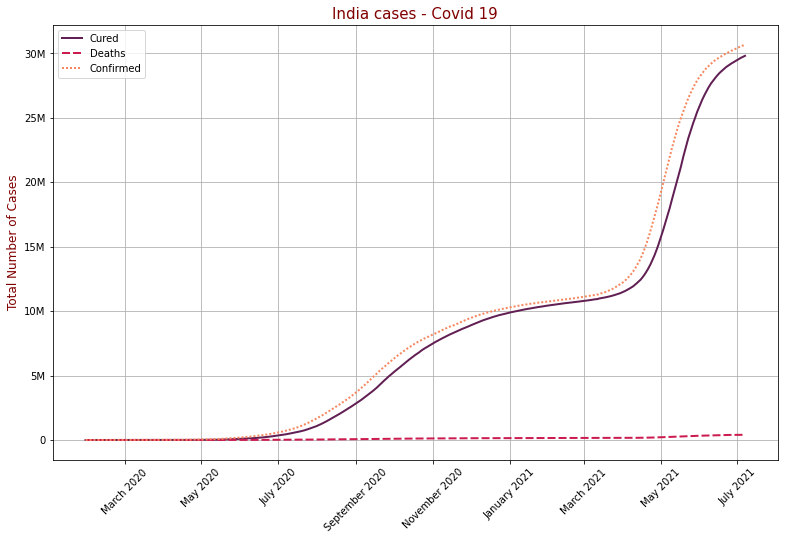

In [33]:
plt.figure(figsize=(13,8))
sns.lineplot(data = covid_time, palette= 'rocket' , linewidth = 2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.yticks(np.arange(0,3.5,0.5)*10000000 , labels =['0','5M','10M','15M','20M','25M','30M'])
plt.xticks(rotation = 45 )
plt.title('India cases - Covid 19', fontsize = 15, color = 'maroon')
plt.xlabel('')
plt.ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')
plt.legend(labels =['Cured','Deaths','Confirmed'])
plt.grid(True)
plt.show()

### Analyzing State-Wise trends<a id='ecanalyzestate'></a>

The dataset contains multiple observations for each state corresponding to different days for the period of Jan 2020 to july 2021. In order to analyse statewise distribution, the data is agreegated for each state by calculating the sum of number of Cured, Confirmed and Death Cases. Also, Active Cases for each state are calculated and added as a seperate variable.

There were few states which were either being repeated or combined with other states. These are handled by eliminating the unwanted observations so that a single truth version exists for each state.

<table>
    <thead>
        <tr>
            <td> State Value </td>
            <td> Reason for Elimination </td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> Bihar**** </td>
            <td> Bihar Already Exists without aterisks </td>
        </tr>
        <tr>
            <td> Cases being reassigned to states </td>
            <td> Invalid State Name </td>
        </tr>
        <tr>
            <td> Unassigned </td>
            <td> Invalid State Name </td>
        </tr>
        <tr>
            <td> Daman & Diu AND Dadra and Nagar Haveli </td>
            <td> Present as combined in dataset due to low number of cases </td>
        </tr>
    </tbody>
</table>

The date column is also removed as not needed to for state-wise analysis

In [34]:
covid_df['State'].replace({'Telengana': 'Telangana'}, inplace=True)
covid_state = covid_df.groupby('State').max()
# covid_state.loc['Daman & Diu'] = covid_state.loc['Dadra and Nagar Haveli and Daman and Diu'] - covid_state.loc['Dadra and Nagar Haveli']
covid_state = covid_state.drop(index = ['Bihar****','Cases being reassigned to states','Unassigned',
                                        'Daman & Diu','Dadra and Nagar Haveli'], axis =0 )
covid_state = covid_state.drop(columns = 'Date')

covid_state

,Cured,Deaths,Confirmed
State,,,
Andaman and Nicobar Islands,7343,128,7487
Andhra Pradesh,1861937,12898,1908065
Arunachal Pradesh,34525,181,37879
Assam,493306,4717,522267
Bihar,711913,9612,722746
Chandigarh,60837,809,61752
Chhattisgarh,977893,13462,996359
Dadra and Nagar Haveli and Daman and Diu,10532,4,10575
Delhi,1408853,25001,1434687


The Mortality and Recovery Rate is calculated (per 100) persons. This provides an insight into the quality of COVID-19 measures being taken in different states. Also, the number of Active cases are also calculated to analyse the overall COVID-19 situation in July 2021.

In [35]:
covid_state['Active'] = covid_state['Confirmed'] - (covid_state['Cured'] + covid_state['Deaths'])
covid_state['Mortality Rate (per 100 persons)'] = round(covid_state['Deaths']/covid_state['Confirmed']* 100,2)
covid_state['Recovery Rate (per 100 persons)'] = round(covid_state['Cured']/covid_state['Confirmed']* 100,2)
display(covid_state)

,Cured,Deaths,Confirmed,Active,Mortality Rate (per 100 persons),Recovery Rate (per 100 persons)
State,,,,,,
Andaman and Nicobar Islands,7343,128,7487,16,1.71,98.08
Andhra Pradesh,1861937,12898,1908065,33230,0.68,97.58
Arunachal Pradesh,34525,181,37879,3173,0.48,91.15
Assam,493306,4717,522267,24244,0.90,94.45
Bihar,711913,9612,722746,1221,1.33,98.50
Chandigarh,60837,809,61752,106,1.31,98.52
Chhattisgarh,977893,13462,996359,5004,1.35,98.15
Dadra and Nagar Haveli and Daman and Diu,10532,4,10575,39,0.04,99.59
Delhi,1408853,25001,1434687,833,1.74,98.20


#### Analysing the Variables using ColorMaps<a id='eccolormap'></a>

It can be observed that:

* Maharashtra has the Highest Number of Cured, Deaths, Active and Confirmed Cases.
* However, the mortality rate is the highest in Punjab with 2.7 Deaths per 100 Confirmed cases.
* The recovery rate is highest for Dadra and Nagar Haveli and Daman and Diu that has the least mortality rate too.
* Telangana has the slowest recovery rate and also high number of active cases

In [36]:
covid_state.sort_values(by = 'Confirmed', ascending= False).style.background_gradient(cmap='PuBu',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='BuGn',subset=["Cured"])\
                        .background_gradient(cmap='OrRd',subset=["Active"])\
                        .background_gradient(cmap='coolwarm',subset=["Mortality Rate (per 100 persons)"])\
                        .background_gradient(cmap='Pastel1',subset=["Recovery Rate (per 100 persons)"])

,Cured,Deaths,Confirmed,Active,Mortality Rate (per 100 persons),Recovery Rate (per 100 persons)
State,,,,,,
Maharashtra,5872268,123531,6113335,117536,2.020000,96.060000
Kerala,2877557,13960,2996094,104577,0.470000,96.040000
Karnataka,2784030,35526,2859595,40039,1.240000,97.360000
Tamil Nadu,2435872,33132,2503481,34477,1.320000,97.300000
Andhra Pradesh,1861937,12898,1908065,33230,0.680000,97.580000
Uttar Pradesh,1682130,22656,1706818,2032,1.330000,98.550000
West Bengal,1472132,17834,1507241,17275,1.180000,97.670000
Delhi,1408853,25001,1434687,833,1.740000,98.200000
Chhattisgarh,977893,13462,996359,5004,1.350000,98.150000


#### Top Summarise for the entire Nation<a id='ectopsum'></a>

In [37]:
mean_mor_rate = round(covid_state['Mortality Rate (per 100 persons)'].mean(), 2)
mean_rec_rate = round(covid_state['Recovery Rate (per 100 persons)'].mean(), 2)
print('Total Active Covid Cases in India: ', covid_state['Active'].sum())
print('Average Recovery Rate of India: ', mean_rec_rate)
print('Average Mortality rate of India due to Covid 19 : ', mean_mor_rate)

Total Active Covid Cases in India:  459920
Average Recovery Rate of India:  96.19
Average Mortality rate of India due to Covid 19 :  1.25


### Top 10 Figures & Visualizations<a id='ectopten'></a>

#### Highest Active Cases<a id='ecactive'></a>

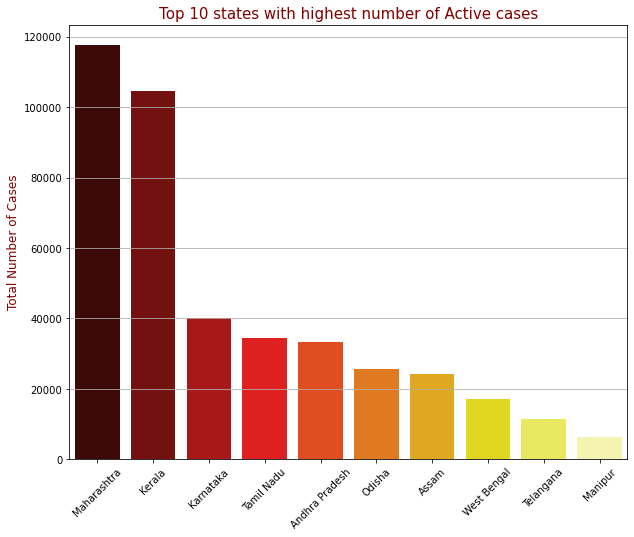

In [38]:
# Top 10 states with highest number of Active cases

top_10_active = covid_state.sort_values(by = 'Active', ascending= False)[['Active']][:10].reset_index()

plt.figure(figsize=(10,8))
plt.grid(True)
sns.barplot(data = top_10_active, x = 'State', y = 'Active', palette='hot' )
plt.xticks(rotation = 45)
plt.xlabel('')
plt.title('Top 10 states with highest number of Active cases', fontsize = 15, color = 'maroon')
plt.ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')

plt.show()


#### Lowest Active Cases<a id='ecactivelow'></a>

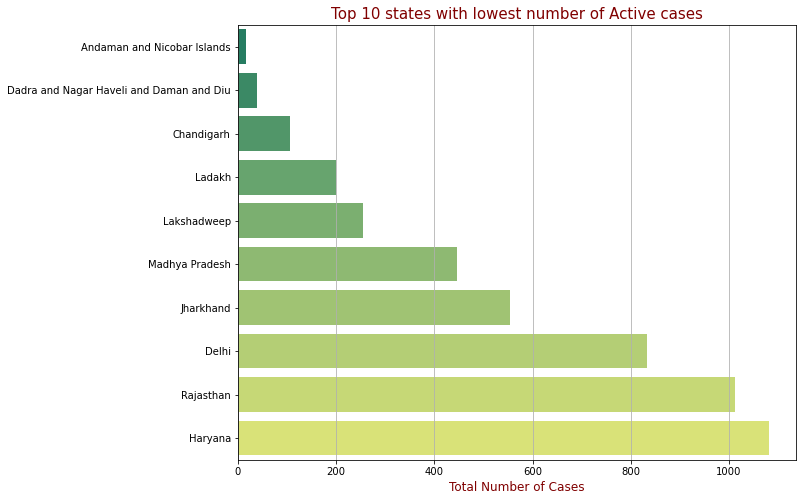

In [39]:
# Top 10 states with lowest number of Active cases

top_10_active_low = covid_state.sort_values(by = 'Active', ascending= True)[['Active']][:10].reset_index()

plt.figure(figsize=(10,8))
plt.grid(True)
sns.barplot(data = top_10_active_low, x = 'Active', y = 'State', palette='summer' , orient = 'h')
# plt.xticks(rotation = 90)
plt.ylabel('')
plt.title('Top 10 states with lowest number of Active cases', fontsize = 15, color = 'maroon')
plt.xlabel('Total Number of Cases', fontsize = 12, color = 'maroon')

plt.show()


#### Highest Number of Deaths<a id='ecdeaths'></a>

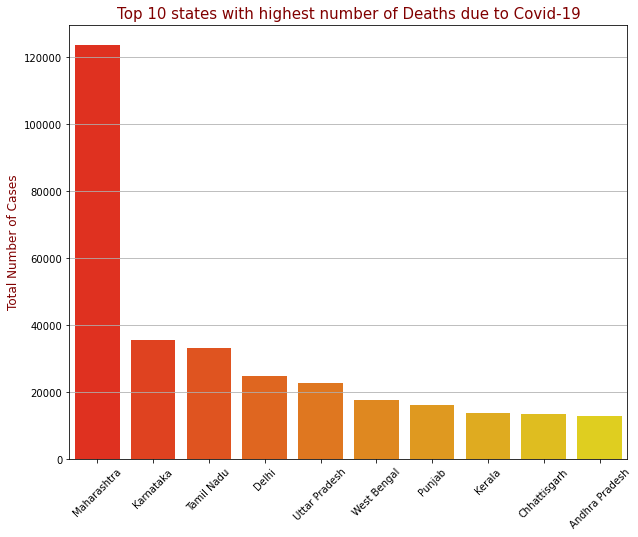

In [40]:
# Top 10 states with highest number of deaths due to Covid

top_10_death = covid_state.sort_values(by = 'Deaths', ascending= False)[['Deaths']][:10].reset_index()

plt.figure(figsize=(10,8))
plt.grid(True)
sns.barplot(data = top_10_death, x = 'State', y = 'Deaths', palette='autumn' )
plt.xticks(rotation = 45)
plt.xlabel('')
plt.title('Top 10 states with highest number of Deaths due to Covid-19', fontsize = 15, color = 'maroon')
plt.ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')
plt.show()


#### Highest Number of Confirmed Cases<a id='ecconfirmed'></a>

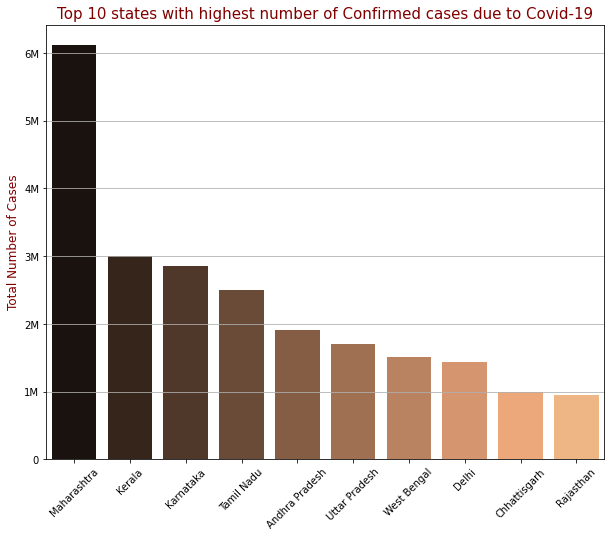

In [41]:
# Top 10 states with highest number of Confirmed Cases

top_10_confirmed = covid_state.sort_values(by = 'Confirmed', ascending= False)[['Confirmed']][:10].reset_index()

plt.figure(figsize=(10,8))
plt.grid(True)
sns.barplot(data = top_10_confirmed, x = 'State', y = 'Confirmed', palette='copper' )
plt.xticks(rotation = 45)
plt.xlabel('')
plt.yticks(np.arange(7)*1000000 , labels =['0','1M','2M','3M','4M','5M','6M'])
plt.title('Top 10 states with highest number of Confirmed cases due to Covid-19', fontsize = 15, color = 'maroon')
plt.ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')
plt.show()

## EDA of COVID-19 Testing in India<a id='edatest'></a>

In this section, COVID-19 Testing in india as being analysed based on number of Total Sample Collection, Negative and Positive results. This provides us an insight into the amount of testing being conducted in India along with the positivity rate.

### Handling Null Values<a id='etnull'></a>

In [42]:
# Checking for Null Values
test_df.isnull().sum()

Date               0
State              0
TotalSamples       0
Negative        8457
Positive        9524
dtype: int64

It can be observed that there are more than 8k and 9k null values in Negative and Positive columns respectively. To eliminate, the variable Total Samples is utilized. Custom functions are devloped to handle different scenarios :

<table>
    <thead>
        <tr>
            <td><b> Scenario </b></td>
            <td><b> Value in Negative Column </b></td>
            <td><b> Value in Positive Column </b></td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td> Both Columns are NULL </td>
            <td> Remove </td>
            <td> Remove </td>
        </tr>
        <tr>
            <td> Both are not Null </td>
            <td> Difference between Total Samples and Positive </td>
            <td> Original Value in Positive Column </td>
        </tr>
        <tr>
            <td> Negative is NULL but Positive is not </td>
            <td> Difference between Total Samples and Positive </td>
            <td> Original Value in Positive Column </td>
        </tr>
        <tr>
            <td> Positive is NULL but Negative is not </td>
            <td> Original Value Total Samples </td>
            <td> Difference between Total Samples and Negative </td>
        </tr>
    </tbody>
</table>

In [43]:
# Writing function to treat the incorrect values for the Negative samples

import numpy as np

def acc_neg_val(ts,neg, pos):
    if (pd.isnull(neg) & pd.isnull(pos)):
        return None
    
    elif (pd.notnull(neg) & pd.notnull(pos) ):
        return (ts - pos)

        
    elif (pd.isnull(neg) & pd.notnull(pos) ):
        return (ts - pos)

    elif (pd.notnull(neg) & pd.isnull(pos) ):
        return ts
    
    else:
        return None
    
# Writing function to treat positive values in the dataframe

def acc_pos_val(ts,neg, pos):
    if (pd.isnull(neg) & pd.isnull(pos)):
        return None
    
    elif (pd.notnull(neg) & pd.notnull(pos) ):
        return pos

        
    elif (pd.isnull(neg) & pd.notnull(pos) ):
        return pos

    elif (pd.notnull(neg) & pd.isnull(pos) ):
         return (ts - neg)
    
    else:
        return None

After applying the transformation based on above rules, there are no Null values in the dataset.

In [44]:
#Replacing the transformed values in the main dataframe
test_df['Negative'] = np.vectorize(acc_neg_val)(test_df['TotalSamples'], test_df['Negative'],test_df['Positive'])
test_df['Positive'] = np.vectorize(acc_pos_val)(test_df['TotalSamples'], test_df['Negative'],test_df['Positive'])

# Checking for any null values
test_df.dropna(inplace=True)
test_df.isnull().sum()

Date            0
State           0
TotalSamples    0
Negative        0
Positive        0
dtype: int64

In [45]:
#test_df.drop(['True_Negative','True_Positive'], axis=1, inplace=True)
test_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0


### Visualizing Covid-19 Testing Trends <a id='etvisualize'></a>

The below bar plot describe the distribution of Negative, Positive and Total Samples collected for 15 states with most sample collection.

It can be observed that Uttar Pradesh has the highes number of Testing Samples Collection record while Punjab is at the least amog these top 15 states. 

It can also be seen that Maharashtra Shows the most number of Positive Cases.

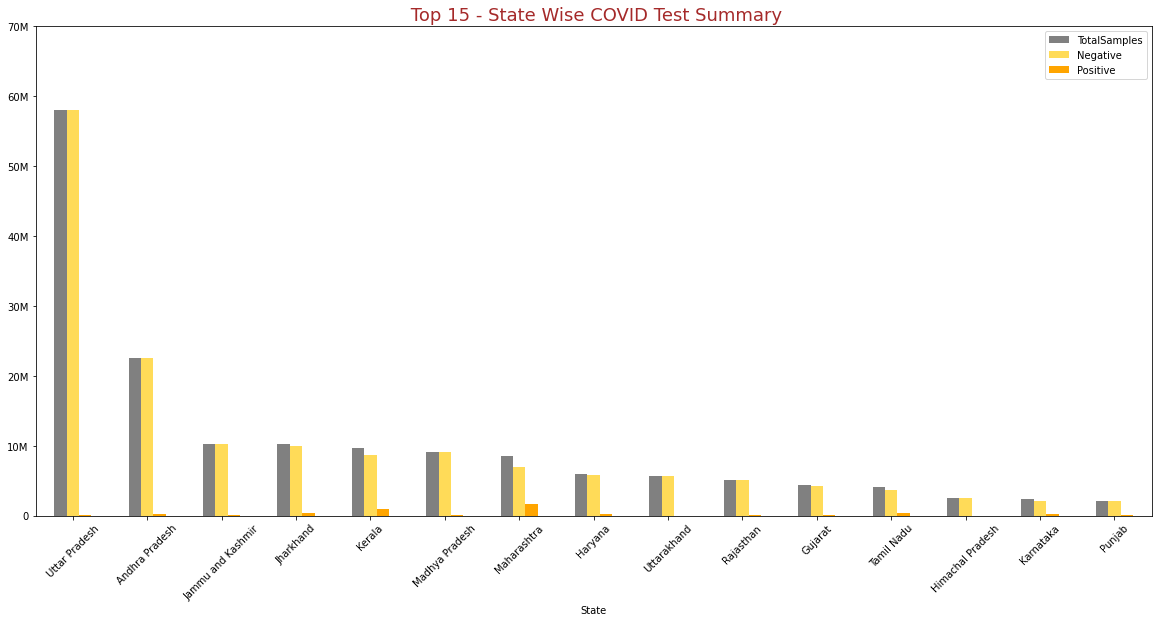

In [46]:
test_df.groupby('State')[['TotalSamples','Negative','Positive']].max().sort_values(by = ['TotalSamples'],ascending=False)[:15].plot.bar(figsize = (20,9), rot = 0, color = ("grey","#FFDB58","orange"))
plt.yticks(ticks = (np.arange(0,8)*10000000), labels = ['0','10M','20M','30M','40M','50M','60M','70M'])
plt.title(" Top 15 - State Wise COVID Test Summary", fontsize = 18, color = 'Brown')
plt.xticks(rotation = 45)
plt.show()


The below plot shows 15 states with high positivity rate in India. Positivity rate defines the number of Positive cases collected out of Total number of Samples. 

It can be observed that Maharashtra is the worst affected state with high number of Positive COVID-19 cases. 
Although Kerela falls at the second place, the difference between the number of Cases between the country is very huge

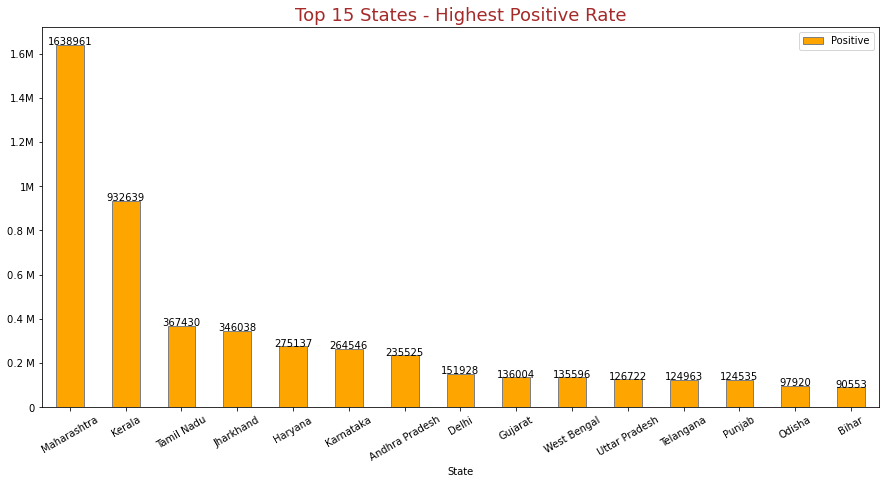

In [47]:
st_df_pos=test_df.groupby('State')[['TotalSamples','Positive','Negative']].max().sort_values(by = ['Positive'],ascending=False)[:15]
st_df_pos.reset_index(inplace= True)
st_df_pos.plot.bar(x = 'State', y = ['Positive'], rot = 30,figsize = (15,7), color = 'orange',edgecolor = 'grey')
plt.yticks(ticks = (np.arange(0,1.8,.2)*1000000), labels = ['0','0.2 M','0.4 M','0.6 M', '0.8 M','1M','1.2M','1.4M','1.6M'])
plt.title("Top 15 States - Highest Positive Rate", fontsize = 18, color = 'brown')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,round(y[i]), ha = 'center')
        

        
addlabels(st_df_pos.State,st_df_pos.Positive)
plt.show()



### Visualizing Daily Trends<a id='etvisualizedaily'></a>

The daily sample collection and negative cases show almost a similar kind of trend. The number steadily rises from zero to 20 million with a spike in July 2021 where the number tests conducted reached 60 Million.

The positivity rate increased till October 2020 and then started declining. It can be seen that positivity rate shows fluctuations indicating that the virus spread was not declining rather kept fluctuating and finally settling at around 0.25 milion in July 2021

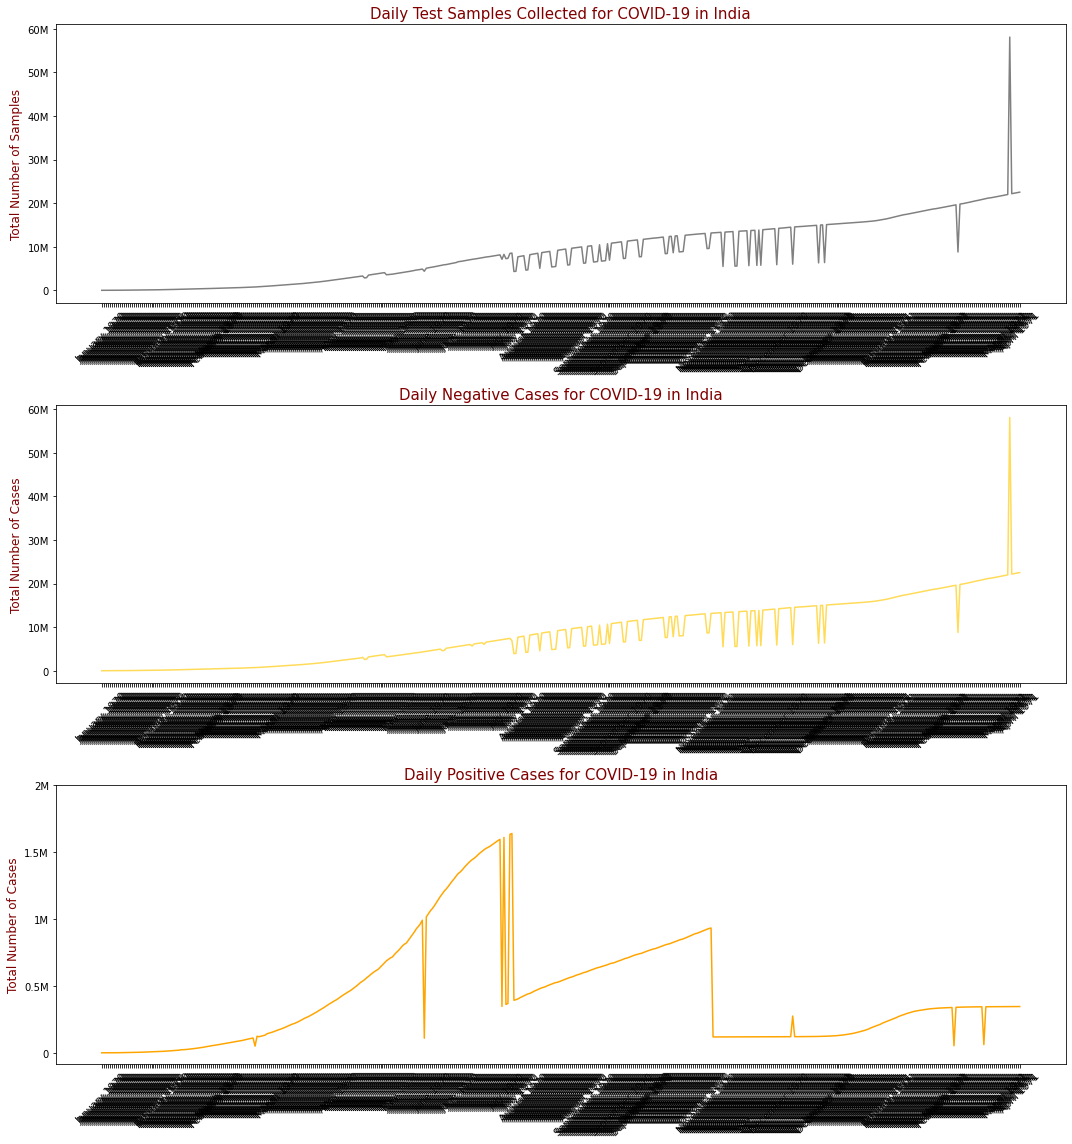

In [48]:
import matplotlib.dates as mdates
%matplotlib inline

test_df_date = test_df.groupby('Date')[['TotalSamples','Positive','Negative']].max().sort_index()

fig = plt.figure(figsize = (15,16))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(test_df_date['TotalSamples'],color = 'grey')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
ax1.set_yticks(np.arange(7)*10000000)
ax1.set_yticklabels(['0','10M','20M','30M','40M','50M','60M'] )
ax1.tick_params(axis='x', labelrotation = 45)
ax1.set_title('Daily Test Samples Collected for COVID-19 in India', fontsize = 15, color = 'maroon')
ax1.set_ylabel('Total Number of Samples', fontsize = 12, color = 'maroon')
fig.tight_layout()

ax2.plot(test_df_date['Negative'], color = '#FFDB58')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
ax2.set_yticks(np.arange(7)*10000000)
ax2.set_yticklabels(['0','10M','20M','30M','40M','50M','60M'] )
ax2.tick_params(axis='x', labelrotation = 45)
ax2.set_title('Daily Negative Cases for COVID-19 in India', fontsize = 15, color = 'maroon')
ax2.set_ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')
fig.tight_layout()

ax3.plot(test_df_date['Positive'], color = 'orange')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
ax3.set_yticks(np.arange(0,2.5,0.5)*1000000)
ax3.set_yticklabels(['0','0.5M','1M','1.5M','2M'] )
ax3.tick_params(axis='x', labelrotation = 45)
ax3.set_title('Daily Positive Cases for COVID-19 in India', fontsize = 15, color = 'maroon')
ax3.set_ylabel('Total Number of Cases', fontsize = 12, color = 'maroon')
fig.tight_layout()


## EDA of COVID-19 Vacination in India<a id='edavaccine'></a>

In this section, Vaccination against COVID-19 in india is being analysed based on number of Dose administered and individuals who got vaccinated belonging to different sexual orientation. This provides us an insight into the amount of vaccination being conducted in India along with the gender-wise distribution.

### Summary Stats<a id='evsummary'></a>

In [49]:
vaccine_df[vaccine_df['State']== 'India'][['Total Doses Administered','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)']].max()

#vaccine_df[['Total Doses Administered','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)']].sum()


Total Doses Administered               356192949.0
Male(Individuals Vaccinated)           191160373.0
Female(Individuals Vaccinated)         164971125.0
Transgender(Individuals Vaccinated)        61451.0
dtype: float64

### Additional Date Columns <a id='evdate'></a>

Month and Year Columns are derived from existing Date column. This enables to analyse data at different granularity.

In [50]:
def getMonth(date):
    return(date.strftime('%b'))

def getYear(date):
    return(date.strftime('%Y'))

vaccine_df['Month']=vaccine_df['Date'].apply(getMonth)
vaccine_df['Year']=vaccine_df['Date'].apply(getYear)
vaccine_df['Month_year'] = vaccine_df['Month'].map(str) +' ' + vaccine_df['Year']

#vaccine_df['Month Year'] = pd.concat(vaccine_df['Month'], vaccine_df['Year'], axis = 1)

vaccine_df

,Date,State,Total Doses Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated,Month,Year,Month_year
0,2021-01-16,India,48276.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0,Jan,2021,Jan 2021
1,2021-01-17,India,58604.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0,Jan,2021,Jan 2021
2,2021-01-18,India,99449.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0,Jan,2021,Jan 2021
3,2021-01-19,India,195525.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0,Jan,2021,Jan 2021
4,2021-01-20,India,251280.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0,Jan,2021,Jan 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,2021-07-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul,2021,Jul 2021
6695,2021-07-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul,2021,Jul 2021
6696,2021-07-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul,2021,Jul 2021
6697,2021-07-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jul,2021,Jul 2021


### Visualizing Vaccination Trends<a id='evtrends'></a>

The below line graph shows the cumulative data for number of Vaccine Administered in India. It also compares the usage of two major variants of Vaccine in India i.e, Covaxin and Covishield.

It can observed that Covishield is the most preferred choice for COVID-19 vaccine in India. Since Covaxin is not approved by WHO, it is not preferred and thus displays very low number of doses.

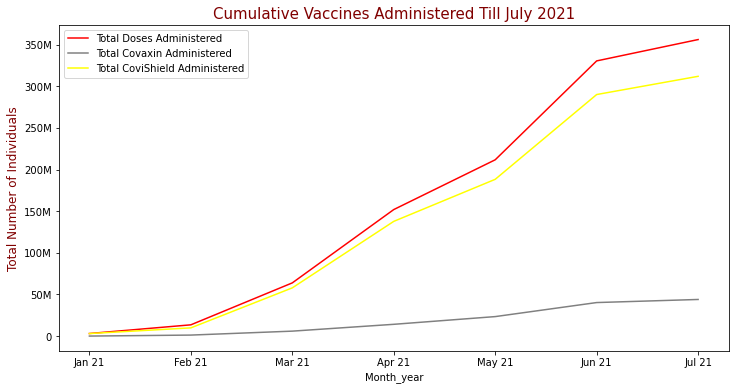

In [51]:
vaccine_date_gen = vaccine_df[vaccine_df['State'] == 'India'].groupby(['Month_year']).max().sort_values(by = 'Total Covaxin Administered')
#vaccine_date_gen = vaccine_df[vaccine_df['State'] == 'India'].groupby('Date').sum().sort_index()
#vaccine_date_gen.reset_index(inplace= True)
vaccine_date_gen[['Total Doses Administered','Total Covaxin Administered','Total CoviShield Administered']].plot(figsize = (12,6),  rot = 0, color =( 'red','grey','yellow'))
plt.xticks (ticks = np.arange(0,7),labels = ['Jan 21','Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21'])
plt.yticks (ticks = (np.arange(0,4,0.5)*100000000),labels = ['0', '50M', '100M',  '150M','200M', '250M', '300M','350M'])
plt.title('Cumulative Vaccines Administered Till July 2021', fontsize = 15, color = 'maroon')
plt.ylabel('Total Number of Individuals', fontsize = 12, color = 'maroon')



plt.show()



### Variant-Wise Distribution of Administered Vaccines<a id='evvariant'></a>

The below pie chart shows that 87.65% of total vaccination was done using Covishield Vaccine. 

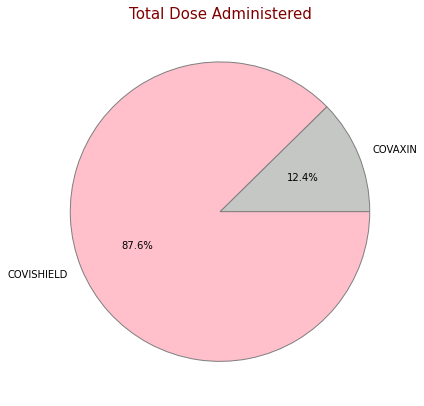

In [52]:
vaccine_covax_dose = vaccine_df[(vaccine_df['State'] == 'India') ][['Total Covaxin Administered']].max()
vaccine_covishield_dose = vaccine_df[(vaccine_df['State'] == 'India') ][['Total CoviShield Administered']].max()
#print(vaccine_covax_dose,vaccine_covishield_dose)


Vaccine = ['COVAXIN', 'COVISHIELD']
  
data = [vaccine_covax_dose[0],vaccine_covishield_dose[0]]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data, labels=Vaccine, autopct='%.1f%%', colors = ['#C5C7C4','pink'], wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
ax.set_title('Total Dose Administered', fontsize = 15, color = 'maroon')
plt.tight_layout()

plt.show()
  

### Month-Wise Analysis of Vaccination<a id='evmonth'></a>

It can be observed that the vaccination for both the variants increased from Jan 2021 to July 2021. The June month witnessed the most Vaccinations however, in July it was drastically reduced.

The range of values for Covishield are in hundereds of million while for Covaxin its just in 10's of millions.

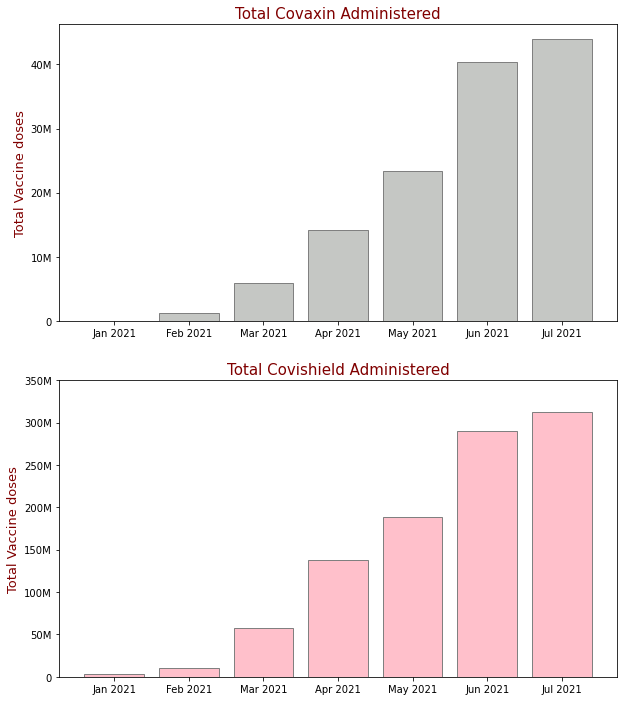

In [53]:
vaccine_date_dose = vaccine_df[vaccine_df['State'] == 'India'].groupby(['Month_year'])[['Total Covaxin Administered','Total CoviShield Administered']].max().sort_values(by = 'Total Covaxin Administered')


fig = plt.figure(figsize = (10,12))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(vaccine_date_dose.index.values,vaccine_date_dose['Total Covaxin Administered'], color = '#C5C7C4', edgecolor = 'grey')
ax1.set_yticks(np.arange(5)*10000000)
ax1.set_yticklabels(['0','10M','20M','30M','40M'])
ax1.set_title('Total Covaxin Administered', fontsize = 15, color = 'maroon')
ax1.set_ylabel('Total Vaccine doses', fontsize = 13,color = 'maroon')


    
ax2.bar(vaccine_date_dose.index.values,vaccine_date_dose['Total CoviShield Administered'], color = 'pink', edgecolor = 'grey')
ax2.set_yticks(np.arange(0,4,0.5)*100000000)
ax2.set_yticklabels(['0','50M','100M','150M','200M','250M','300M','350M'])
ax2.set_title('Total Covishield Administered', fontsize = 15, color = 'maroon')
ax2.set_ylabel('Total Vaccine doses', fontsize = 13,color = 'maroon')


plt.show()

### Gender-Wise Distribution of Vaccination<a id='evgender'></a>

It can be observed that there was not a huge difference between men and women vaccination figures. With 53.7% men and 46.32% women, there were just 0.02% transgenders who got vaccinated. 

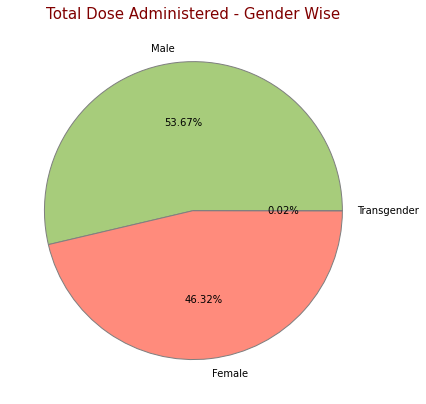

In [54]:
vaccine_male = vaccine_df[(vaccine_df['State'] == 'India') ][['Male(Individuals Vaccinated)']].max()
vaccine_female = vaccine_df[(vaccine_df['State'] == 'India') ][['Female(Individuals Vaccinated)']].max()
vaccine_trans = vaccine_df[(vaccine_df['State'] == 'India') ][['Transgender(Individuals Vaccinated)']].max()
#print(vaccine_covax_dose,vaccine_covishield_dose)


gender = ['Male', 'Female', 'Transgender']
  
data = [vaccine_male[0],vaccine_female[0],vaccine_trans[0]]


fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(data, labels=gender, autopct='%.2f%%', colors = ['#a7cc7b','#ff8b7c','#000066'], wedgeprops = { 'linewidth' : 1, 'edgecolor' : "grey" })
ax.set_title('Total Dose Administered - Gender Wise', fontsize = 15, color = 'maroon')
plt.tight_layout()

plt.show()
  

### Month-over-Month Analysis of Gender-wise distribution of Vaccination<a id='evmom'></a>

It can be observed that July witnessed the most vaccinations while January witnessed the least. Although the distribution of male and female is same for every month.

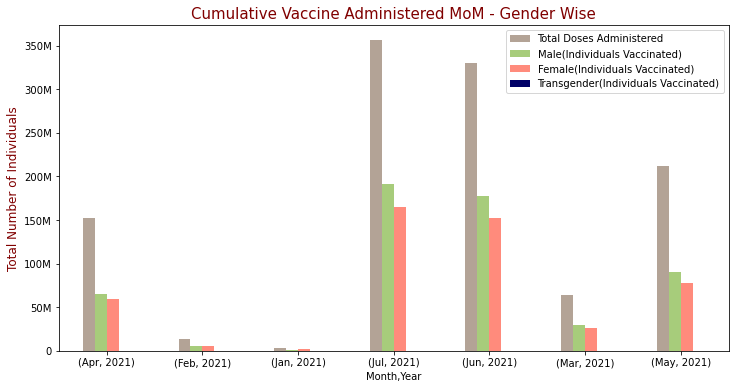

In [55]:
vaccine_date_gen = vaccine_df[vaccine_df['State'] == 'India'].groupby(['Month','Year']).max().sort_index()
#vaccine_date_gen = vaccine_df[vaccine_df['State'] == 'India'].groupby('Date').sum().sort_index()
vaccine_date_gen[['Total Doses Administered','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)']].plot(figsize = (12,6), kind = 'bar', rot = 0, color = ['#b3a396','#a7cc7b','#ff8b7c','#000066'])
# plt.xticks (ticks = np.arange(0,7),labels = ['Jan 21','Feb 21', 'Mar 21', 'Apr 21', 'May 21', 'Jun 21', 'Jul 21'])
plt.yticks (ticks = (np.arange(0,4,0.5)*100000000),labels = ['0', '50M', '100M',  '150M','200M', '250M', '300M','350M'])
plt.title('Cumulative Vaccine Administered MoM - Gender Wise', fontsize = 15, color = 'maroon')
plt.ylabel('Total Number of Individuals', fontsize = 12, color = 'maroon')

#addlabels(vaccine_date_gen[['Month','Year']],vaccine_date_gen[['Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)']])

plt.show()

### State-Wise Distribution of Vaccination<a id='evstate'></a>

<AxesSubplot:xlabel='State'>

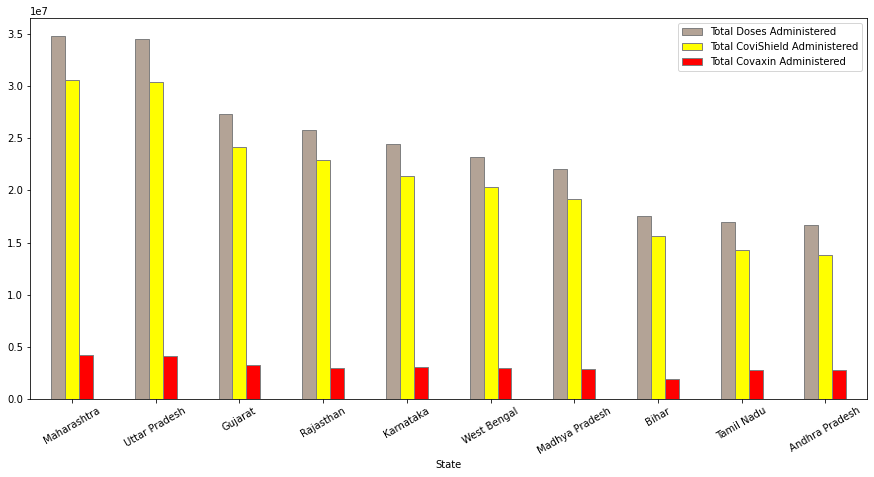

In [58]:
vaccine_state_dose = vaccine_df[vaccine_df['State'] != 'India'].groupby(['State'])[['Total Doses Administered','Total Covaxin Administered','Total CoviShield Administered']].max().sort_values(by = 'Total Doses Administered', ascending = False)[:10]


vaccine_state_dose.reset_index(inplace= True)
vaccine_state_dose.plot.bar(x = 'State', y = ['Total Doses Administered','Total CoviShield Administered','Total Covaxin Administered'], rot = 30,figsize = (15,7), color = ('#b3a396','yellow','red'), edgecolor = 'grey')


## EDA of Power and Mobility condition in India<a id='edapowmob'></a>

### Unifying Misspelled Statenames<a id='epmspell'></a>


There are some states in different datasets that are unique, but with different spellings. We need to find them and make them unified

The provinces that have different spells in power_df dataset are:

**Uttar Pradesh**<br>
**Himchal Pradesh**<br>
**Jummu and Kashmir**<br>
**Madhya Pradesh**<br>
**Darda and Nagar Haveli**<br>
**Puducherry**

We detected this provinces and changed them to a same format as they are in covid_df dataset. Also, the dataset mobility_df doesn't have problem of miss spelling or abbreviation  

In [81]:
# Unifying the different states in power_df dataframe:
power_df['State'].replace(['UP','HP','J&K','MP','DNH','Pondy'],
                          ['Uttar Pradesh','Himachal Pradesh','Jammu and Kashmir',
                        'Madhya Pradesh','Dadra and Nagar Haveli','Puducherry'],inplace=True)

power_df['Date'] = pd.to_datetime(power_df['Date'])

In [87]:
# Unifying the different states in mobility_df dataframe:
mobility_df['State'].replace('Daman and Diu',
                             'Dadra and Nagar Haveli and Daman and Diu',inplace=True)
mobility_df['Date'] = pd.to_datetime(mobility_df['Date'])

### Merging COVID, Mobility & Power Data<a id='epmmerge'></a>


In [88]:
new_df = pd.merge(covid_df,power_df,on=['Date','State'])

In [89]:
new_df = pd.merge(new_df,mobility_df,on=['Date','State'])

In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45297 entries, 0 to 45296
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date                                               45297 non-null  datetime64[ns]
 1   State                                              45297 non-null  object        
 2   Cured                                              45297 non-null  int64         
 3   Deaths                                             45297 non-null  int64         
 4   Confirmed                                          45297 non-null  int64         
 5   Power_usage                                        45297 non-null  float64       
 6   grocery_and_pharmacy_percent_change_from_baseline  41917 non-null  float64       
 7   parks_percent_change_from_baseline                 43791 non-null  float64       
 8   transit_stations

In [91]:
new_df['State'].nunique() #There are 31 unique states in our dataframe

31

After merging all three datasets of: <strong>covid_df</strong> , **power_df** , **mobility_df** we chech the unique number of states and we have 31 unique states in our dataset.

### Number of missing values in each variable<a id='epmmiss'></a>

Text(0.5, 1.0, 'Number of missing values in each column\n')

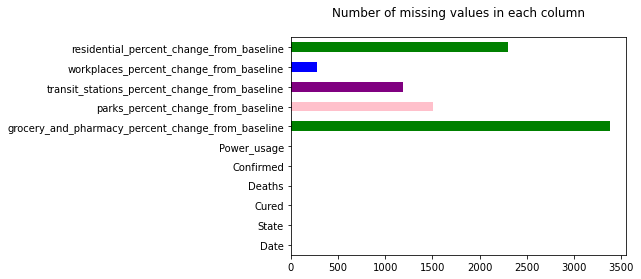

In [92]:
new_df.isnull().sum().plot(kind='barh',color=['purple','b','g','pink'])
plt.title('Number of missing values in each column\n')

We draw a barplot to visualize the number of missing values in each variable. We can see that variables <strong>ConfirmedForeingNational</strong> and <strong>ConfirmedIndianNational</strong> have too many missing values nd we can not run evaluations on these variables. On the other hand, variables <strong>Power_usage, Confirmed, Deaths, </strong> and <strong>Cured</strong> does not have any missing values!

## Research Questions<a id='research'></a>
### [1 - Which provinces had the most average value for power consumption?](#Power)
### [2 -  Which provinces had the worst change in mobility during Covid-19 pandemic?](#Mobility)
### [ 3 - Is there any relationship between Covid-19 Confirmed/Death cases and mobility in India?](#Mobility_rel)
### [4 - Is there any relationship between Covid-19 Confirmed/Death cases and the Power Cunsumption in India?](#Mobility_rel)
### [5 - Which parts of india affected the most during Covid-19?](#????)
### [6- Is the number of Covid confirmed/Death cases related with the ration of urban to rural population?](#Ratio)

<a name="Power"></a>

### Power consumption evaluation

In [93]:
display(new_df.groupby('State')['Power_usage'].mean().sort_values())

State
Mizoram                1.685185
Nagaland               2.028302
Arunachal Pradesh      2.137255
Manipur                2.506106
Tripura                3.751064
Chandigarh             3.927273
Meghalaya              5.982561
Puducherry             7.361194
Goa                   10.922034
Jharkhand             23.341509
Assam                 24.473585
Himachal Pradesh      25.892188
Uttarakhand           35.338571
Jammu and Kashmir     44.572368
Kerala                72.234343
Odisha                78.471014
Bihar                 79.858730
Chhattisgarh          81.360606
Delhi                 82.656627
West Bengal          132.577612
Haryana              138.322222
Punjab               143.752632
Andhra Pradesh       175.880822
Telangana            183.660241
Karnataka            206.625000
Madhya Pradesh       210.368750
Rajasthan            217.826829
Tamil Nadu           305.797436
Uttar Pradesh        306.124691
Gujarat              319.449231
Maharashtra          426.389474
Na

In [94]:
new_df.groupby('State')['Power_usage'].mean().sort_values().tail()

State
Rajasthan        217.826829
Tamil Nadu       305.797436
Uttar Pradesh    306.124691
Gujarat          319.449231
Maharashtra      426.389474
Name: Power_usage, dtype: float64

In this part, we want to see the average power consumption of each province during lockdown and pandemic. Getting the Series of mean power usage, we want to find top 5 province with the most share of power consumption, so after sorting ascendingly, we run 'tail' method to get the top 5 states. These states are:<br><br>Rajastan<br>Tamil Nadu<br>Uttar Pradesh<br>Gujarat<br>Maharashtra

<a name="Mobility"></a>

### Mobility consumption evaluation

#### Finding the top 5 states with worst mobility change in each area of mobility with the change percentage:

In [95]:
# Second Research Question:
print('Top 5 states with the worst mobility change in grocery and pharmacy are:\n',new_df.groupby('State')['grocery_and_pharmacy_percent_change_from_baseline'].mean().sort_values().head(),'\n')
print('Top 5 states with the worst mobility change in parks are:\n',new_df.groupby('State')['parks_percent_change_from_baseline'].mean().sort_values().head(),'\n')
print('Top 5 states with the worst mobility change in transit stations are:\n',new_df.groupby('State')['transit_stations_percent_change_from_baseline'].mean().sort_values().head(),'\n')
print('Top 5 states with the worst mobility change in workplace are:\n',new_df.groupby('State')['workplaces_percent_change_from_baseline'].mean().sort_values().head(),'\n')
print('Top 5 states with the worst mobility change in residential are:\n',new_df.groupby('State')['residential_percent_change_from_baseline'].mean().sort_values().head(),'\n')

Top 5 states with the worst mobility change in grocery and pharmacy are:
 State
Chandigarh   -72.969697
Nagaland     -62.384615
Meghalaya    -53.183333
Goa          -50.163842
Delhi        -45.969880
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64 

Top 5 states with the worst mobility change in parks are:
 State
Chandigarh   -88.272727
Goa          -74.333333
Delhi        -67.656627
Nagaland     -65.444444
Puducherry   -58.875622
Name: parks_percent_change_from_baseline, dtype: float64 

Top 5 states with the worst mobility change in transit stations are:
 State
Chandigarh       -78.606061
Nagaland         -66.083333
Delhi            -64.838353
West Bengal      -60.778252
Madhya Pradesh   -59.381611
Name: transit_stations_percent_change_from_baseline, dtype: float64 

Top 5 states with the worst mobility change in workplace are:
 State
Chandigarh    -67.348485
Delhi         -58.897590
Goa           -46.536723
Gujarat       -45.962426
Maharashtra   -41.696657
Na

<a name="Mobility_rel"></a>

#### Finding correlations between Confirmed/Deaths values and other measures

In [96]:
variable_interest = ['Power_usage','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                    'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                     'residential_percent_change_from_baseline' ]

#### Finding the correlation between variable 'grocery _and_pharmacy_percent_change_from_baseline' and Deaths and other mobility variables

We can see that grocery and pharmacy change have a considerable correlations with transit stations change, workplace change, and residential change. This correlation between grocery/pharmacy and residential is negative while for other mobility variables is positive

In [97]:
for var in variable_interest:
    print(var,':')
    print(new_df.groupby(['State'])[['grocery_and_pharmacy_percent_change_from_baseline',var]].corr().iloc[0::2,-1].max())
    print(new_df.groupby(['State'])[['grocery_and_pharmacy_percent_change_from_baseline',var]].corr().iloc[0::2,-1].min())
    print('\n')


Power_usage :
0.3620220245619426
-0.24748233252380955


grocery_and_pharmacy_percent_change_from_baseline :
1.0
1.0


parks_percent_change_from_baseline :
0.8663552099131674
-0.32894178890870357


transit_stations_percent_change_from_baseline :
0.9567044467071996
0.3520007152800365


workplaces_percent_change_from_baseline :
0.8591397386328854
0.37459900910447363


residential_percent_change_from_baseline :
-0.5256911588968792
-0.8981454401895231




#### Finding the correlation between variable 'Confirmed' and all mobility variables
Number of Deaths has a statistically significant correlation with these mobility variables:<br>Grocery/Pharmacy<br>
Transit Stations<br>Workplace<br>Residential

In [98]:
for variable in variable_interest:
    print(variable,':')
    print(new_df.groupby(['State'])[['Confirmed',variable]].corr().iloc[0::2,-1].max())
    print(new_df.groupby(['State'])[['Confirmed',variable]].corr().iloc[0::2,-1].min(),'\n')

Power_usage :
0.559295460757422
-0.31051687860496946 

grocery_and_pharmacy_percent_change_from_baseline :
0.6726528244300285
-0.31206099716433294 

parks_percent_change_from_baseline :
0.36785005061103904
-0.6375023747190398 

transit_stations_percent_change_from_baseline :
0.5232367466783144
-0.5072089752187305 

workplaces_percent_change_from_baseline :
0.6453038687116661
-0.5567631445127701 

residential_percent_change_from_baseline :
0.6891178646132671
-0.6134825271614673 



In [99]:
for variable in variable_interest:
    print(variable,':')
    display(new_df.groupby(['State'])[['Deaths',variable]].corr())

Power_usage :


Deaths  Power_usage
State                                               
Andhra Pradesh    Deaths       1.000000     0.283293
                  Power_usage  0.283293     1.000000
Arunachal Pradesh Deaths            NaN          NaN
                  Power_usage       NaN     1.000000
Assam             Deaths       1.000000    -0.265909
...                                 ...          ...
Uttar Pradesh     Power_usage -0.065984     1.000000
Uttarakhand       Deaths       1.000000    -0.052764
                  Power_usage -0.052764     1.000000
West Bengal       Deaths       1.000000    -0.255010
                  Power_usage -0.255010     1.000000

[62 rows x 2 columns]

grocery_and_pharmacy_percent_change_from_baseline :


Deaths  \
State                                                                           
Andhra Pradesh    Deaths                                             1.000000   
                  grocery_and_pharmacy_percent_change_from_baseline  0.227561   
Arunachal Pradesh Deaths                                                  NaN   
                  grocery_and_pharmacy_percent_change_from_baseline       NaN   
Assam             Deaths                                             1.000000   
...                                                                       ...   
Uttar Pradesh     grocery_and_pharmacy_percent_change_from_baseline  0.477767   
Uttarakhand       Deaths                                             1.000000   
                  grocery_and_pharmacy_percent_change_from_baseline  0.563957   
West Bengal       Deaths                                             1.000000   
                  grocery_and_pharmacy_percent_change_from_baseline  0.373004   

                                                                     grocery_and_pharmacy_percent_change_from_baseline  
State                                                                                                                   
Andhra Pradesh    Deaths                                                                                      0.227561  
                  grocery_and_pharmacy_percent_change_from_baseline                                           1.000000  
Arunachal Pradesh Deaths                                                                                           NaN  
                  grocery_and_pharmacy_percent_change_from_baseline                                           1.000000  
Assam             Deaths                                                                                      0.607861  
...                                                                                                                ...  
Uttar Pradesh     grocery_and_pharmacy_percent_change_from_baseline                                           1.000000  
Uttarakhand       Deaths                                                                                      0.563957  
                  grocery_and_pharmacy_percent_change_from_baseline                                           1.000000  
West Bengal       Deaths                                                                                      0.373004  
                  grocery_and_pharmacy_percent_change_from_baseline                                           1.000000  

[62 rows x 2 columns]

parks_percent_change_from_baseline :


Deaths  \
State                                                            
Andhra Pradesh    Deaths                              1.000000   
                  parks_percent_change_from_baseline -0.439696   
Arunachal Pradesh Deaths                                   NaN   
                  parks_percent_change_from_baseline       NaN   
Assam             Deaths                              1.000000   
...                                                        ...   
Uttar Pradesh     parks_percent_change_from_baseline -0.206422   
Uttarakhand       Deaths                              1.000000   
                  parks_percent_change_from_baseline -0.014233   
West Bengal       Deaths                              1.000000   
                  parks_percent_change_from_baseline  0.037416   

                                                      parks_percent_change_from_baseline  
State                                                                                     
Andhra Pradesh    Deaths                                                       -0.439696  
                  parks_percent_change_from_baseline                            1.000000  
Arunachal Pradesh Deaths                                                             NaN  
                  parks_percent_change_from_baseline                            1.000000  
Assam             Deaths                                                        0.058894  
...                                                                                  ...  
Uttar Pradesh     parks_percent_change_from_baseline                            1.000000  
Uttarakhand       Deaths                                                       -0.014233  
                  parks_percent_change_from_baseline                            1.000000  
West Bengal       Deaths                                                        0.037416  
                  parks_percent_change_from_baseline                            1.000000  

[62 rows x 2 columns]

transit_stations_percent_change_from_baseline :


Deaths  \
State                                                                       
Andhra Pradesh    Deaths                                         1.000000   
                  transit_stations_percent_change_from_baseline -0.127274   
Arunachal Pradesh Deaths                                              NaN   
                  transit_stations_percent_change_from_baseline       NaN   
Assam             Deaths                                         1.000000   
...                                                                   ...   
Uttar Pradesh     transit_stations_percent_change_from_baseline -0.126123   
Uttarakhand       Deaths                                         1.000000   
                  transit_stations_percent_change_from_baseline  0.260050   
West Bengal       Deaths                                         1.000000   
                  transit_stations_percent_change_from_baseline  0.098767   

                                                                 transit_stations_percent_change_from_baseline  
State                                                                                                           
Andhra Pradesh    Deaths                                                                             -0.127274  
                  transit_stations_percent_change_from_baseline                                       1.000000  
Arunachal Pradesh Deaths                                                                                   NaN  
                  transit_stations_percent_change_from_baseline                                       1.000000  
Assam             Deaths                                                                              0.473070  
...                                                                                                        ...  
Uttar Pradesh     transit_stations_percent_change_from_baseline                                       1.000000  
Uttarakhand       Deaths                                                                              0.260050  
                  transit_stations_percent_change_from_baseline                                       1.000000  
West Bengal       Deaths                                                                              0.098767  
                  transit_stations_percent_change_from_baseline                                       1.000000  

[62 rows x 2 columns]

workplaces_percent_change_from_baseline :


Deaths  \
State                                                                 
Andhra Pradesh    Deaths                                   1.000000   
                  workplaces_percent_change_from_baseline  0.025291   
Arunachal Pradesh Deaths                                        NaN   
                  workplaces_percent_change_from_baseline       NaN   
Assam             Deaths                                   1.000000   
...                                                             ...   
Uttar Pradesh     workplaces_percent_change_from_baseline  0.101062   
Uttarakhand       Deaths                                   1.000000   
                  workplaces_percent_change_from_baseline  0.391703   
West Bengal       Deaths                                   1.000000   
                  workplaces_percent_change_from_baseline  0.151314   

                                                           workplaces_percent_change_from_baseline  
State                                                                                               
Andhra Pradesh    Deaths                                                                  0.025291  
                  workplaces_percent_change_from_baseline                                 1.000000  
Arunachal Pradesh Deaths                                                                       NaN  
                  workplaces_percent_change_from_baseline                                 1.000000  
Assam             Deaths                                                                  0.566846  
...                                                                                            ...  
Uttar Pradesh     workplaces_percent_change_from_baseline                                 1.000000  
Uttarakhand       Deaths                                                                  0.391703  
                  workplaces_percent_change_from_baseline                                 1.000000  
West Bengal       Deaths                                                                  0.151314  
                  workplaces_percent_change_from_baseline                                 1.000000  

[62 rows x 2 columns]

residential_percent_change_from_baseline :


Deaths  \
State                                                                  
Andhra Pradesh    Deaths                                    1.000000   
                  residential_percent_change_from_baseline  0.222682   
Arunachal Pradesh Deaths                                         NaN   
                  residential_percent_change_from_baseline       NaN   
Assam             Deaths                                    1.000000   
...                                                              ...   
Uttar Pradesh     residential_percent_change_from_baseline  0.125788   
Uttarakhand       Deaths                                    1.000000   
                  residential_percent_change_from_baseline -0.190468   
West Bengal       Deaths                                    1.000000   
                  residential_percent_change_from_baseline -0.217645   

                                                            residential_percent_change_from_baseline  
State                                                                                                 
Andhra Pradesh    Deaths                                                                    0.222682  
                  residential_percent_change_from_baseline                                  1.000000  
Arunachal Pradesh Deaths                                                                         NaN  
                  residential_percent_change_from_baseline                                  1.000000  
Assam             Deaths                                                                   -0.524169  
...                                                                                              ...  
Uttar Pradesh     residential_percent_change_from_baseline                                  1.000000  
Uttarakhand       Deaths                                                                   -0.190468  
                  residential_percent_change_from_baseline                                  1.000000  
West Bengal       Deaths                                                                   -0.217645  
                  residential_percent_change_from_baseline                                  1.000000  

[62 rows x 2 columns]

There isn't much difference between covid confirmed case/deaths and all other variables of interest. It seems that deaths has a bit higher correlation. So we stick to this variable and try to find the relationship of death and other attributes.

In [100]:
for variable in variable_interest:
    print(variable,':')
    print(new_df.groupby(['State'])[['Deaths',variable]].corr().iloc[0::2,-1].max())
    print(new_df.groupby(['State'])[['Deaths',variable]].corr().iloc[0::2,-1].min(),'\n')
    


Power_usage :
0.49639979137148726
-0.26590920795072515 

grocery_and_pharmacy_percent_change_from_baseline :
0.67594658739838
-0.07688527636783599 

parks_percent_change_from_baseline :
0.15491302794125206
-0.5868667678875854 

transit_stations_percent_change_from_baseline :
0.5255926315647023
-0.4563382685425762 

workplaces_percent_change_from_baseline :
0.631614277886793
-0.5080612364421031 

residential_percent_change_from_baseline :
0.6416764379686518
-0.6371918789564952 



Text(0.5, 1.0, 'Residential')

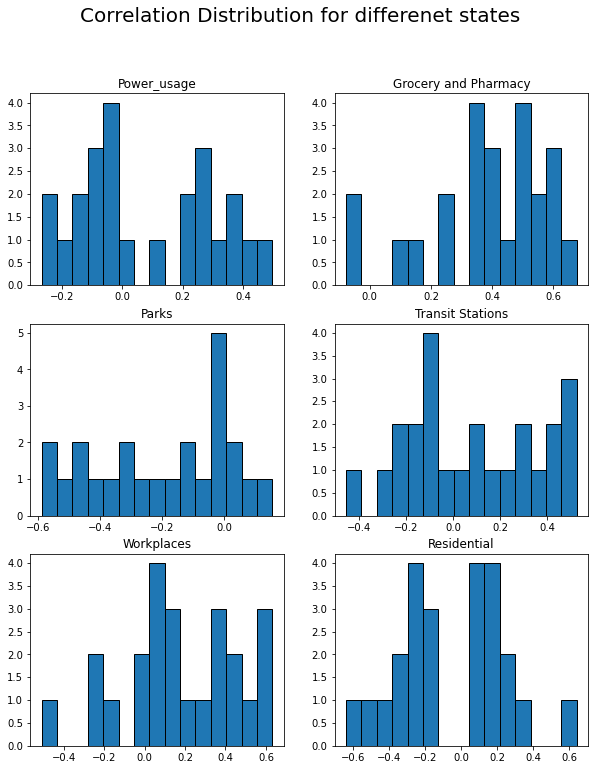

In [101]:
plt.figure(figsize=(10,12))
plt.suptitle('Correlation Distribution for differenet states',fontsize=20)

plt.subplot(3, 2, 1)
plt.hist(new_df.groupby(['State'])[['Deaths','Power_usage']].corr().iloc[0::2,-1],bins=15,edgecolor='k')
plt.title('Power_usage')

plt.subplot(3, 2, 2)
plt.hist(new_df.groupby(['State'])[['Deaths','grocery_and_pharmacy_percent_change_from_baseline']]
         .corr().iloc[0::2,-1],bins=15,edgecolor='k')
plt.title('Grocery and Pharmacy')

plt.subplot(3, 2, 3)
plt.hist(new_df.groupby(['State'])[['Deaths','parks_percent_change_from_baseline']]
         .corr().iloc[0::2,-1],bins=15,edgecolor='k')
plt.title('Parks')

plt.subplot(3, 2, 4)
plt.hist(new_df.groupby(['State'])[['Deaths','transit_stations_percent_change_from_baseline']]
         .corr().iloc[0::2,-1],bins=15,edgecolor='k')
plt.title('Transit Stations')

plt.subplot(3, 2, 5)
plt.hist(new_df.groupby(['State'])[['Deaths','workplaces_percent_change_from_baseline']]
         .corr().iloc[0::2,-1],bins=15,edgecolor='k')
plt.title('Workplaces')

plt.subplot(3, 2, 6)
plt.hist(new_df.groupby(['State'])[['Deaths','residential_percent_change_from_baseline']].
         corr().iloc[0::2,-1],bins=15,edgecolor='k')
plt.title('Residential')


Drawing a histogram to see the distribution of correlation between Deaths and mobility varibles splited by states 

Lets see which states have the significant correlations with each variable:

In [102]:
cor_grocery_pharmacy = new_df.groupby('State')[
    ['Deaths','grocery_and_pharmacy_percent_change_from_baseline']].corr().iloc[0::2,-1]
#cor_grocery_pharmacy
cor_grocery_pharmacy[(cor_grocery_pharmacy>0.5) | (cor_grocery_pharmacy<-0.5)]

State                   
Assam             Deaths    0.607861
Bihar             Deaths    0.612577
Chandigarh        Deaths    0.517045
Gujarat           Deaths    0.539569
Himachal Pradesh  Deaths    0.578440
Karnataka         Deaths    0.504867
Madhya Pradesh    Deaths    0.675947
Uttarakhand       Deaths    0.563957
Name: grocery_and_pharmacy_percent_change_from_baseline, dtype: float64

In [103]:
cor_transit = new_df.groupby('State')[['Deaths','transit_stations_percent_change_from_baseline']].corr().iloc[0::2,-1]
#cor_transit
cor_transit[(cor_transit>0.5) | (cor_transit<-0.5)]

State                 
Madhya Pradesh  Deaths    0.525593
Name: transit_stations_percent_change_from_baseline, dtype: float64

In [104]:
cor_workplace = new_df.groupby('State')[['Deaths','workplaces_percent_change_from_baseline']].corr().iloc[0::2,-1]
#cor_workplace
cor_workplace[(cor_transit>0.5) | (cor_transit<-0.5)]

State                 
Madhya Pradesh  Deaths    0.570971
Name: workplaces_percent_change_from_baseline, dtype: float64

In [105]:
cor_residential = new_df.groupby('State')[['Deaths','residential_percent_change_from_baseline']].corr().iloc[0::2,-1]
#cor_residential
cor_residential[(cor_transit>0.5) | (cor_transit<-0.5)]

State                 
Madhya Pradesh  Deaths   -0.364523
Name: residential_percent_change_from_baseline, dtype: float64

We ran codes to find for each mobility variable, which states have statistically significance correlations. We assumed correlations higher than 0.5 and less than -0.5 are statistically significant. After running codes, we came to an interesting fact! The states with high value of correlations between deaths and all mobility variables are the same for each individual mobility variable.

From now on we will work on the states that have significant correlations which are:
1 - Chandigarh <br>
2 - Gujarat <br>
3 - Himalchal Pradesh <br>
4 - Madhya Pradesh

# Filtering the states of interest

In [106]:
new_df['State'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab',
       'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha',
       'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh',
       'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar',
       'Manipur', 'Mizoram', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya'],
      dtype=object)

In [107]:
states = ['Gujarat','Himachal Pradesh','Madhya Pradesh','Chandigarh']
new_df = new_df[new_df['State'].isin(states)]

### We modified the new_df dataset which is a dataset from merging 3 original primary datasets. We filtered out highly correlated states and removed other provinces.

In [108]:
new_df['State'].unique()

array(['Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh'],
      dtype=object)

# Plotting the confirmed Covid cases and highly correlated variables for each state separately

### We grouped our data based on 4 different state that we now have. We want to get for different plot (one for each state) and plot the variables: **Death**, **grocery/pharmacy**, **transit_stations**, **workplace**, and **residentian** over the time, to compare them separately and see how is the relationship between death and other mobility variables

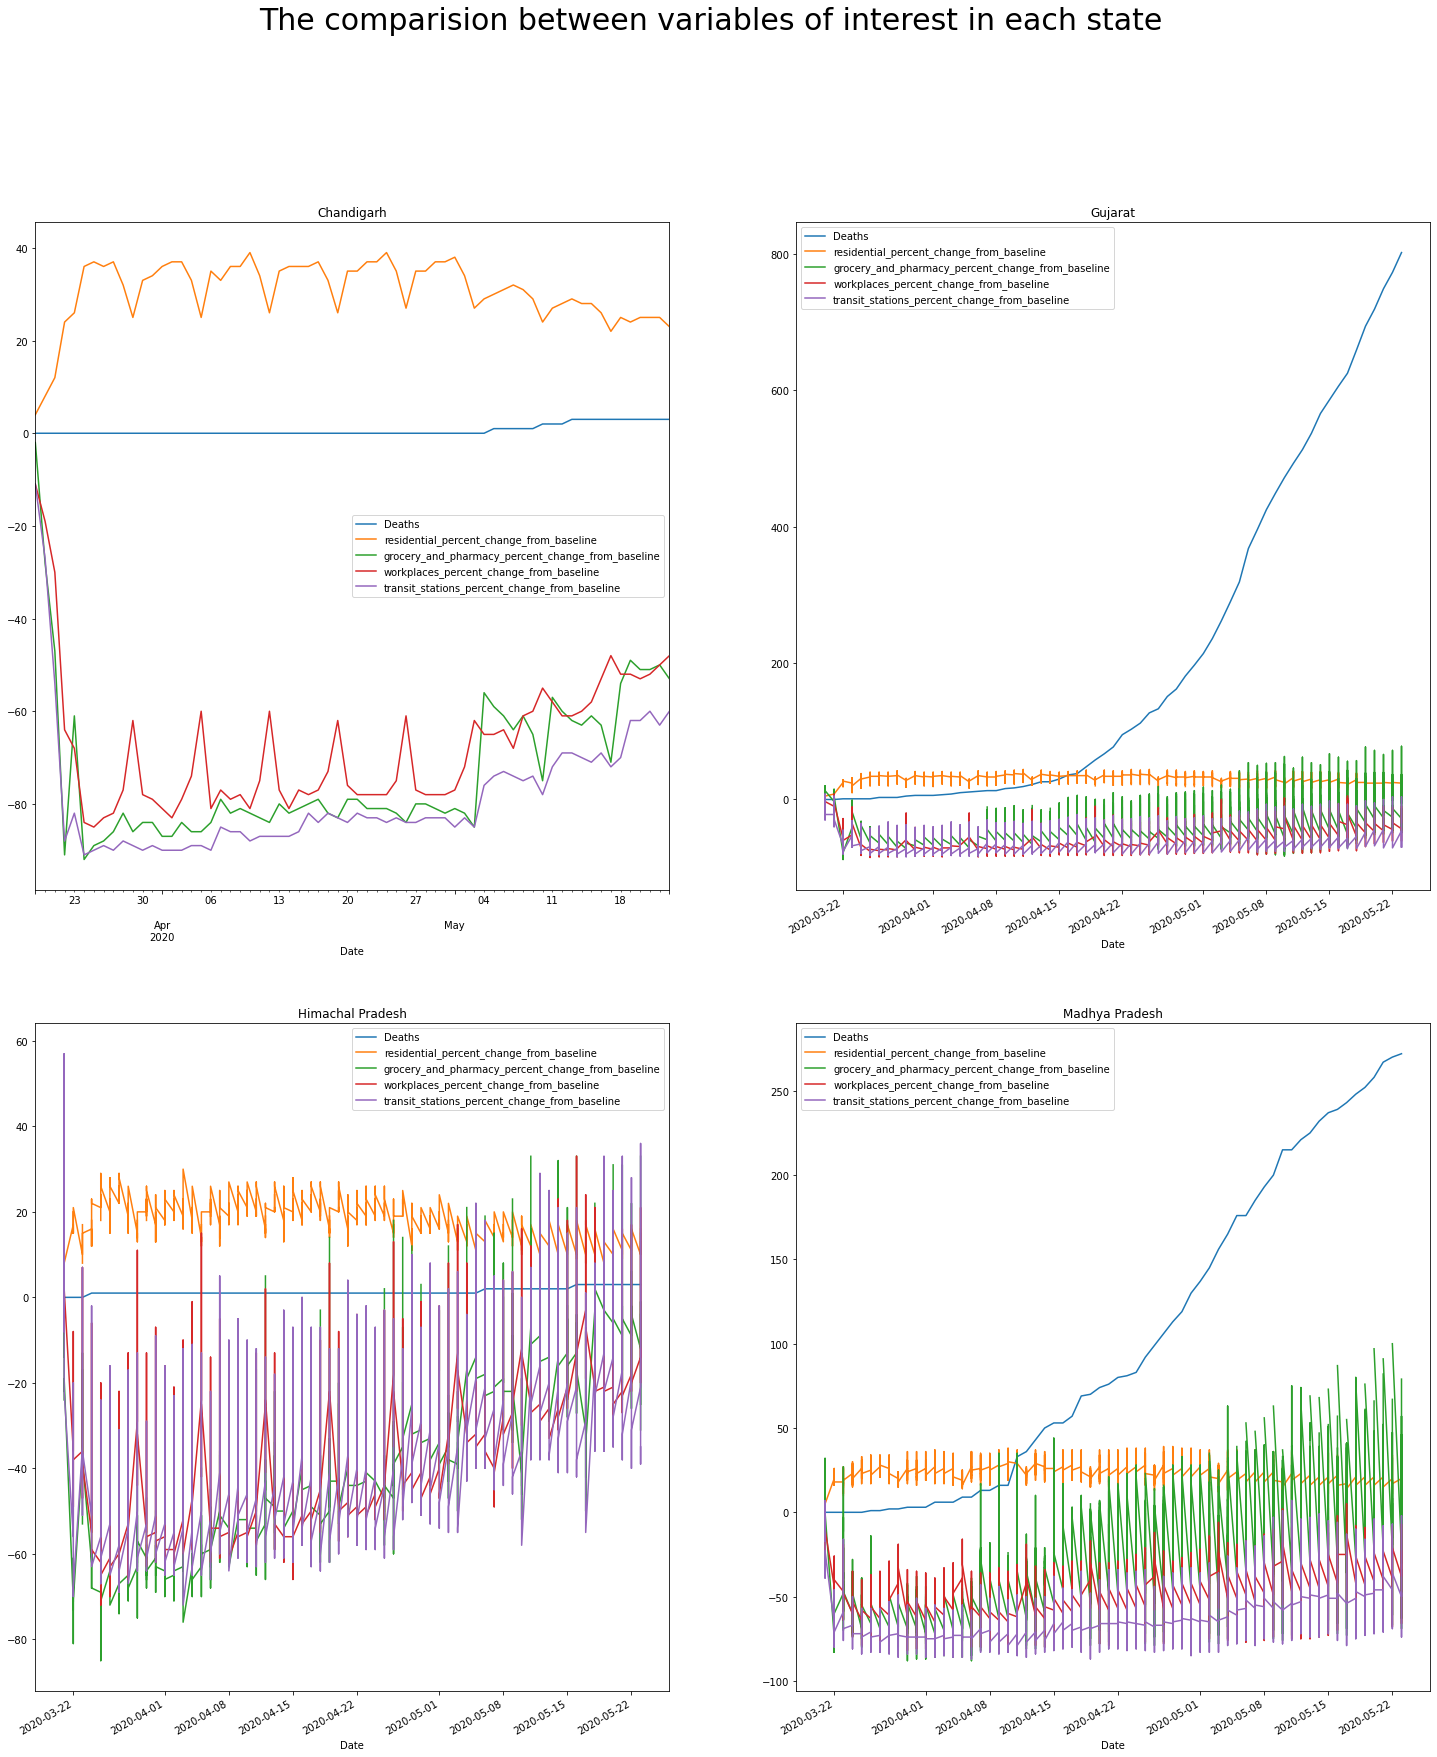

In [109]:
grouped = new_df.groupby('State')

ncols=2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25,30), sharey=False)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped[['Date','Deaths','residential_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
            'workplaces_percent_change_from_baseline','transit_stations_percent_change_from_baseline']
           ].get_group(key).set_index('Date').plot(ax=ax)
    ax.set_title(key)
    
plt.suptitle('The comparision between variables of interest in each state',fontsize=30)
ax.legend()
plt.show()

### After plotting, we see that the scale of variables vary, so we need to normalize all the variables to have a reasonable comparision:

In [110]:
filtered_df = new_df[['Date','State','Deaths','grocery_and_pharmacy_percent_change_from_baseline',
                    'workplaces_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
                        'residential_percent_change_from_baseline']].set_index(['Date','State'])

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
normalized_df = normalize(filtered_df)
normalized_df.reset_index(inplace=True)
normalized_df

,Date,State,Deaths,grocery_and_pharmacy_percent_change_from_baseline,workplaces_percent_change_from_baseline,transit_stations_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-19,Chandigarh,0.000000,0.459184,0.627119,0.540541,0.069767
1,2020-03-20,Gujarat,0.000000,0.515306,0.677966,0.513514,0.069767
2,2020-03-20,Gujarat,0.000000,0.540816,0.661017,0.500000,0.116279
3,2020-03-20,Gujarat,0.000000,0.505102,0.771186,0.614865,0.069767
4,2020-03-20,Gujarat,0.000000,0.464286,0.669492,0.466216,0.116279
...,...,...,...,...,...,...,...
6367,2020-05-23,Madhya Pradesh,0.339152,0.586735,0.627119,0.574324,0.325581
6368,2020-05-23,Madhya Pradesh,0.339152,0.617347,0.601695,0.331081,0.279070
6369,2020-05-23,Madhya Pradesh,0.339152,0.316327,0.322034,0.135135,0.674419
6370,2020-05-23,Madhya Pradesh,0.339152,NaN,0.661017,0.250000,0.325581


### We defined a function to normalize numeric variables of our dataset. We filtered out our dataset to obtin nly the variables of interest which are: Date, State, Deaths, and mobility variables. Then we normalized the variables to have the same scales for numeric columns

Text(0.5, 1.0, 'Area plot of mobility')

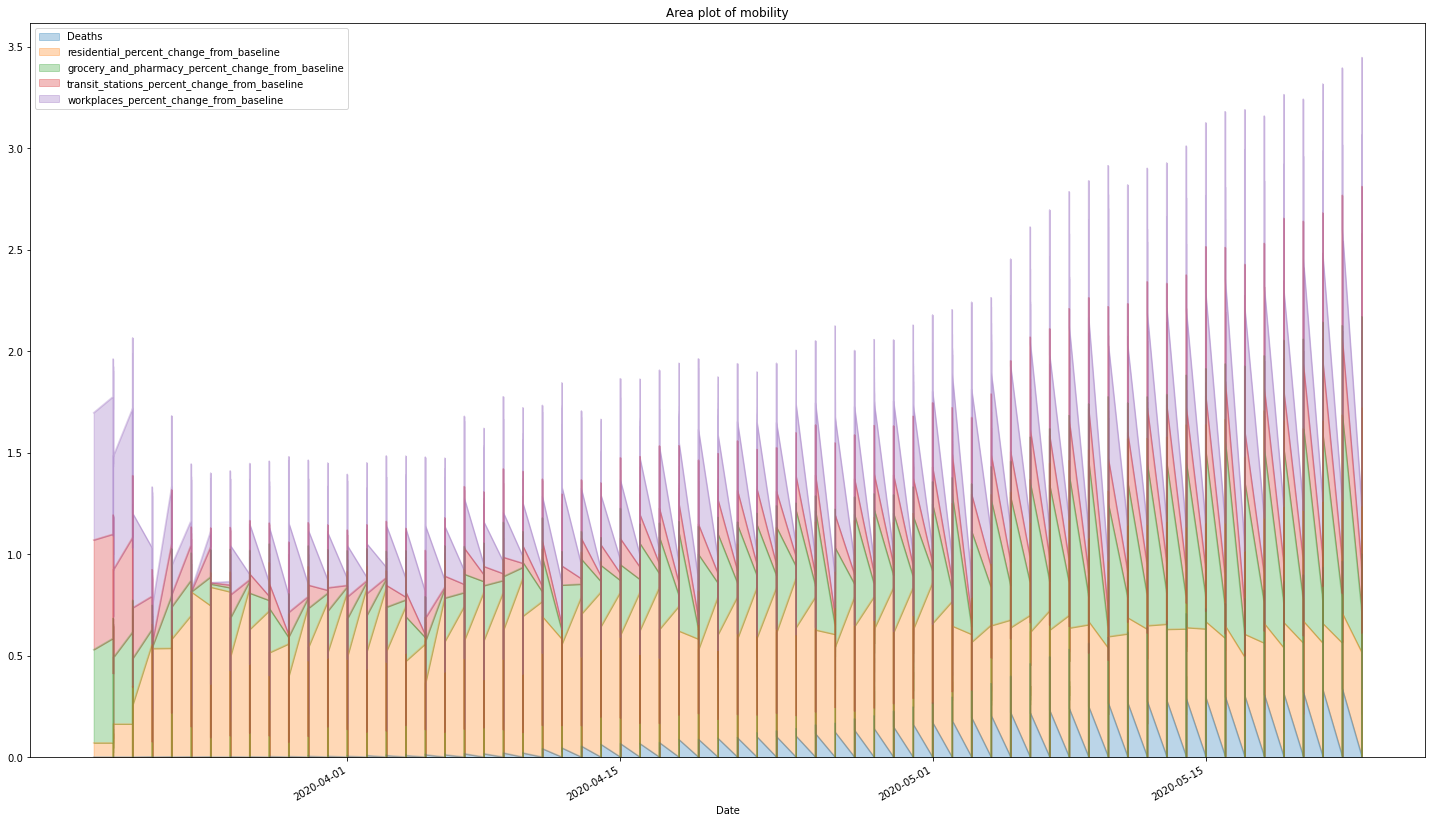

In [111]:
compare = normalized_df[['Deaths','residential_percent_change_from_baseline',
                     'grocery_and_pharmacy_percent_change_from_baseline',
                     'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline']
                       ].set_index(normalized_df['Date'])
#test
compare[:].plot(kind='area',figsize=(25,15),alpha=0.3)
plt.title('Area plot of mobility')

### We draw an Area Plot to find which mobilities have the most change over the time

# Now, we will draw plots for each state separately. Each plot contains 4 subplots. All the scales are the same and normalized.

In [112]:
variable_interest = ['Deaths','grocery_and_pharmacy_percent_change_from_baseline',
                     'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                     'residential_percent_change_from_baseline']
states = ['Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Chandigarh']

Text(0.5, 0.98, 'Comparing variables for Gujarat state')

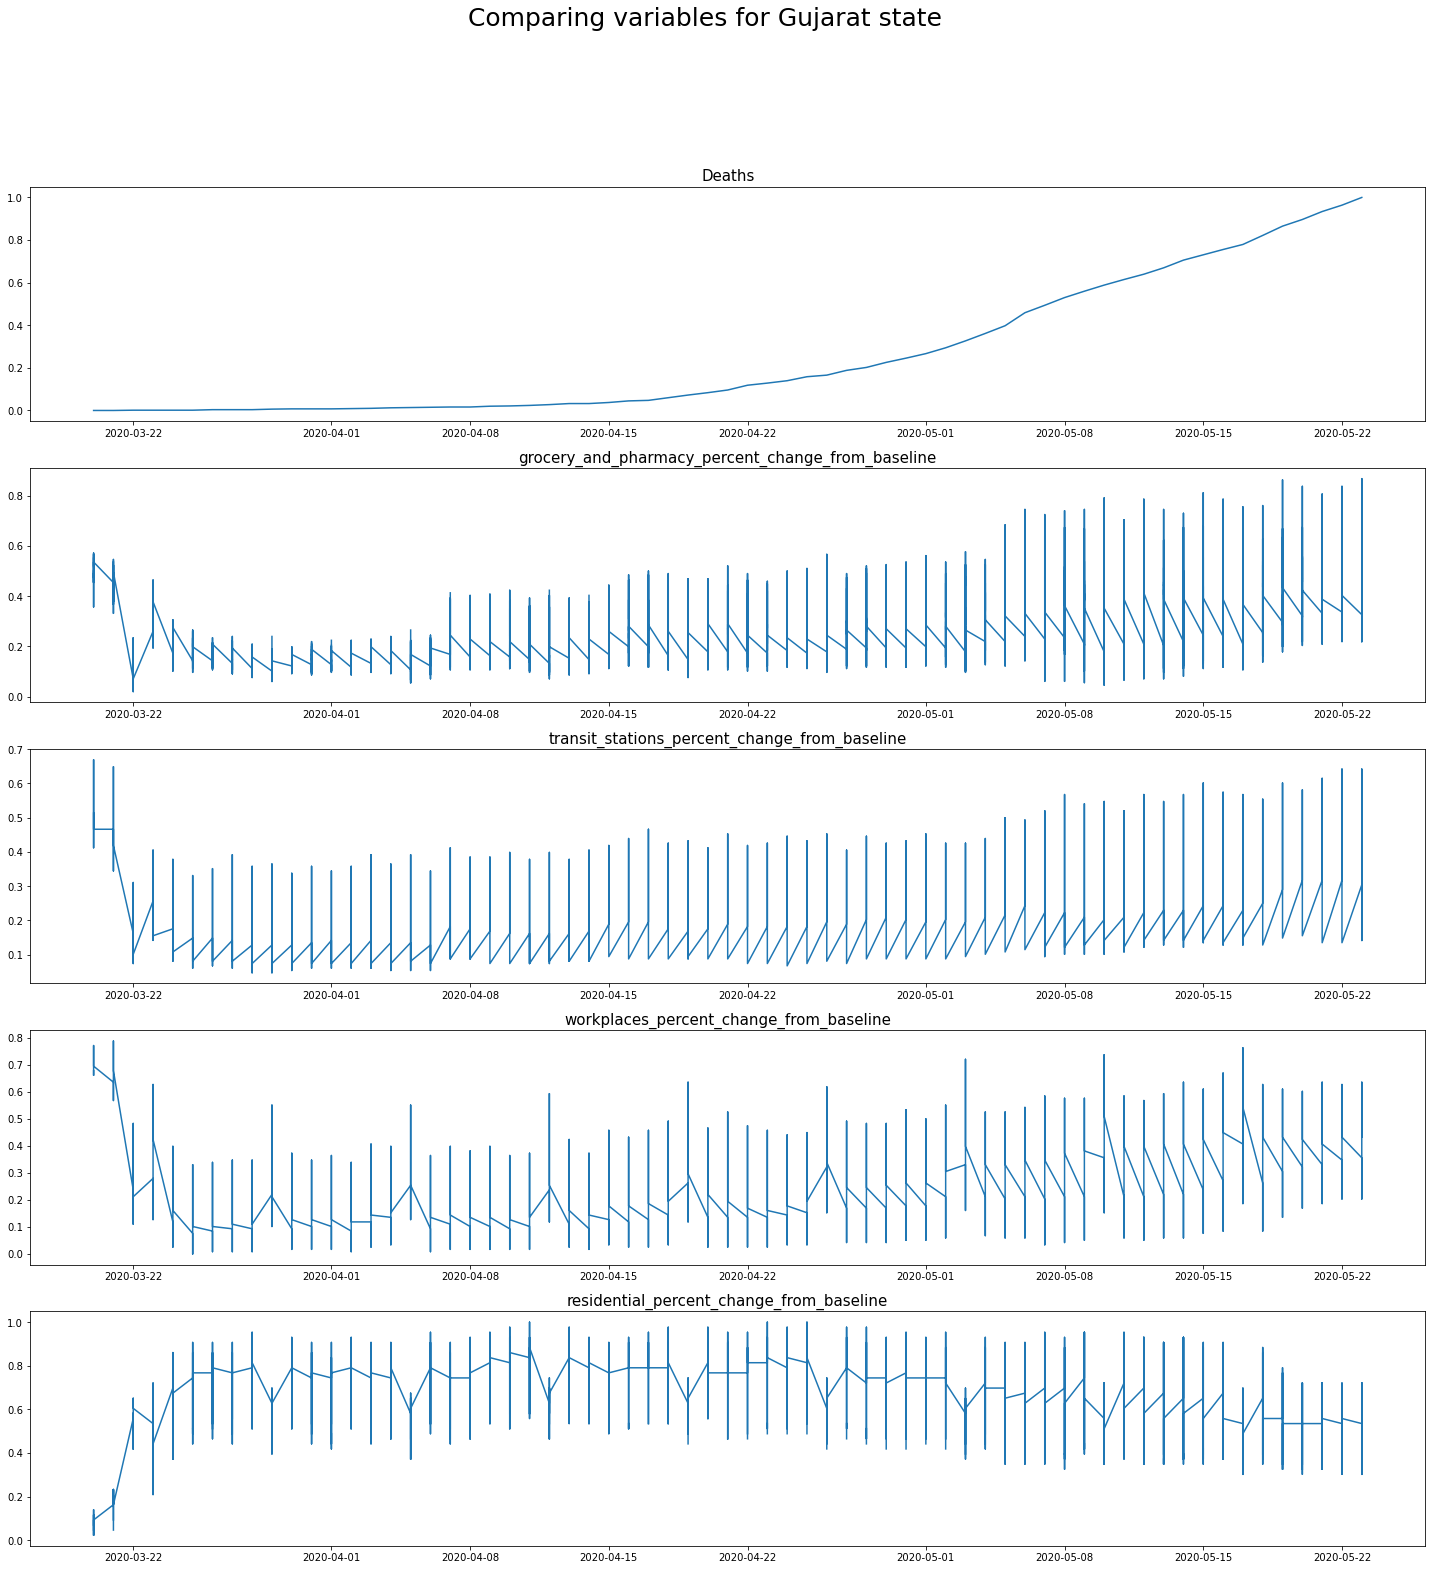

In [113]:
Gujarat = normalized_df[normalized_df['State']=='Gujarat']

fig, axs = plt.subplots(5, 1,figsize=(25,25))
for i in range(5):
    axs[i].plot(Gujarat['Date'],Gujarat[variable_interest[i]])
    axs[i].set_title('{}'.format(variable_interest[i]),fontsize=15)
plt.suptitle('Comparing variables for Gujarat state',fontsize=25)

Text(0.5, 0.98, 'Comparing variables for Himchal Pradesh state')

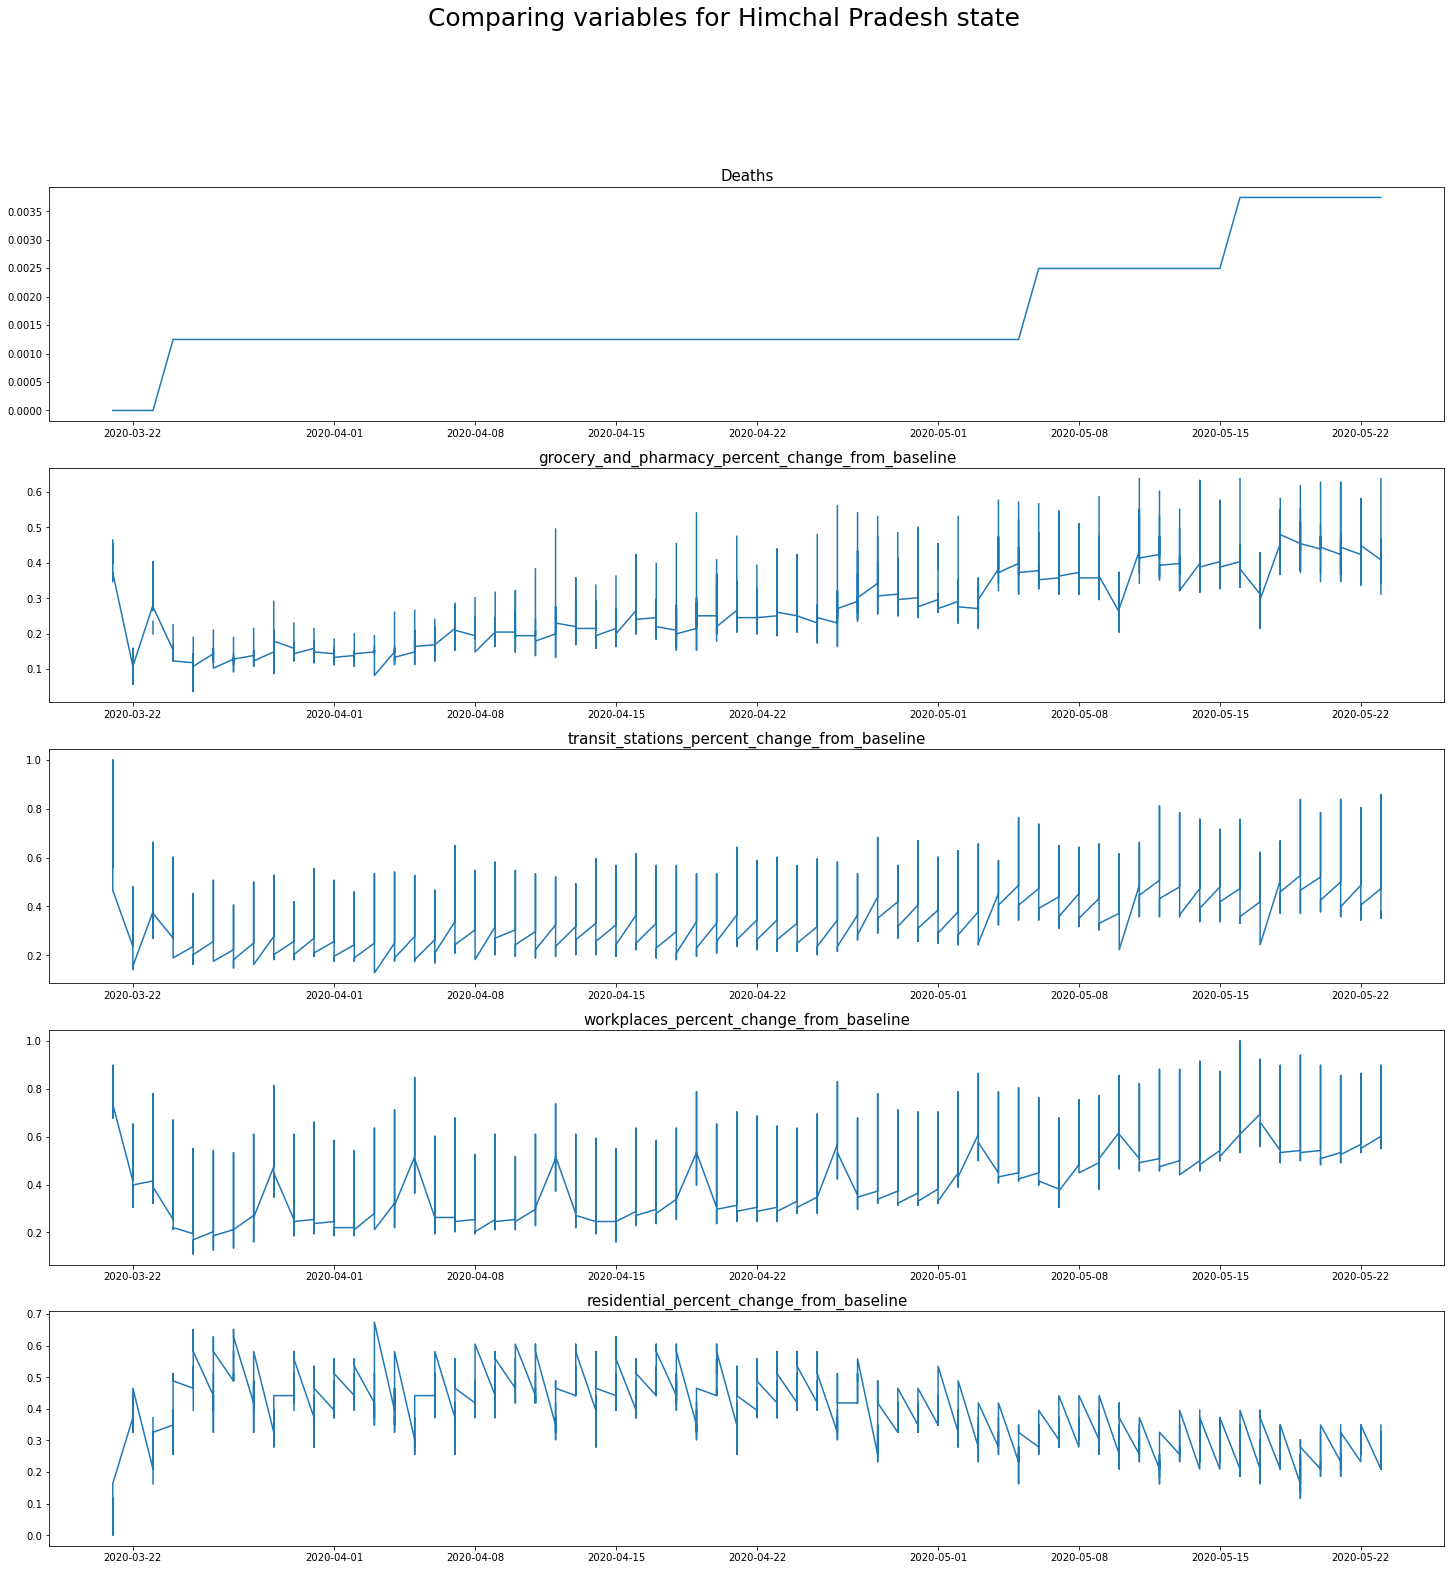

In [114]:
Himachal_Pradesh = normalized_df[normalized_df['State']=='Himachal Pradesh']

fig, axs = plt.subplots(5, 1,figsize=(25,25))
for i in range(5):
    axs[i].plot(Himachal_Pradesh['Date'],Himachal_Pradesh[variable_interest[i]])
    axs[i].set_title('{}'.format(variable_interest[i]),fontsize=15)
plt.suptitle('Comparing variables for Himchal Pradesh state',fontsize=25)

Text(0.5, 0.98, 'Comparing variables for Madhya Pradesh state')

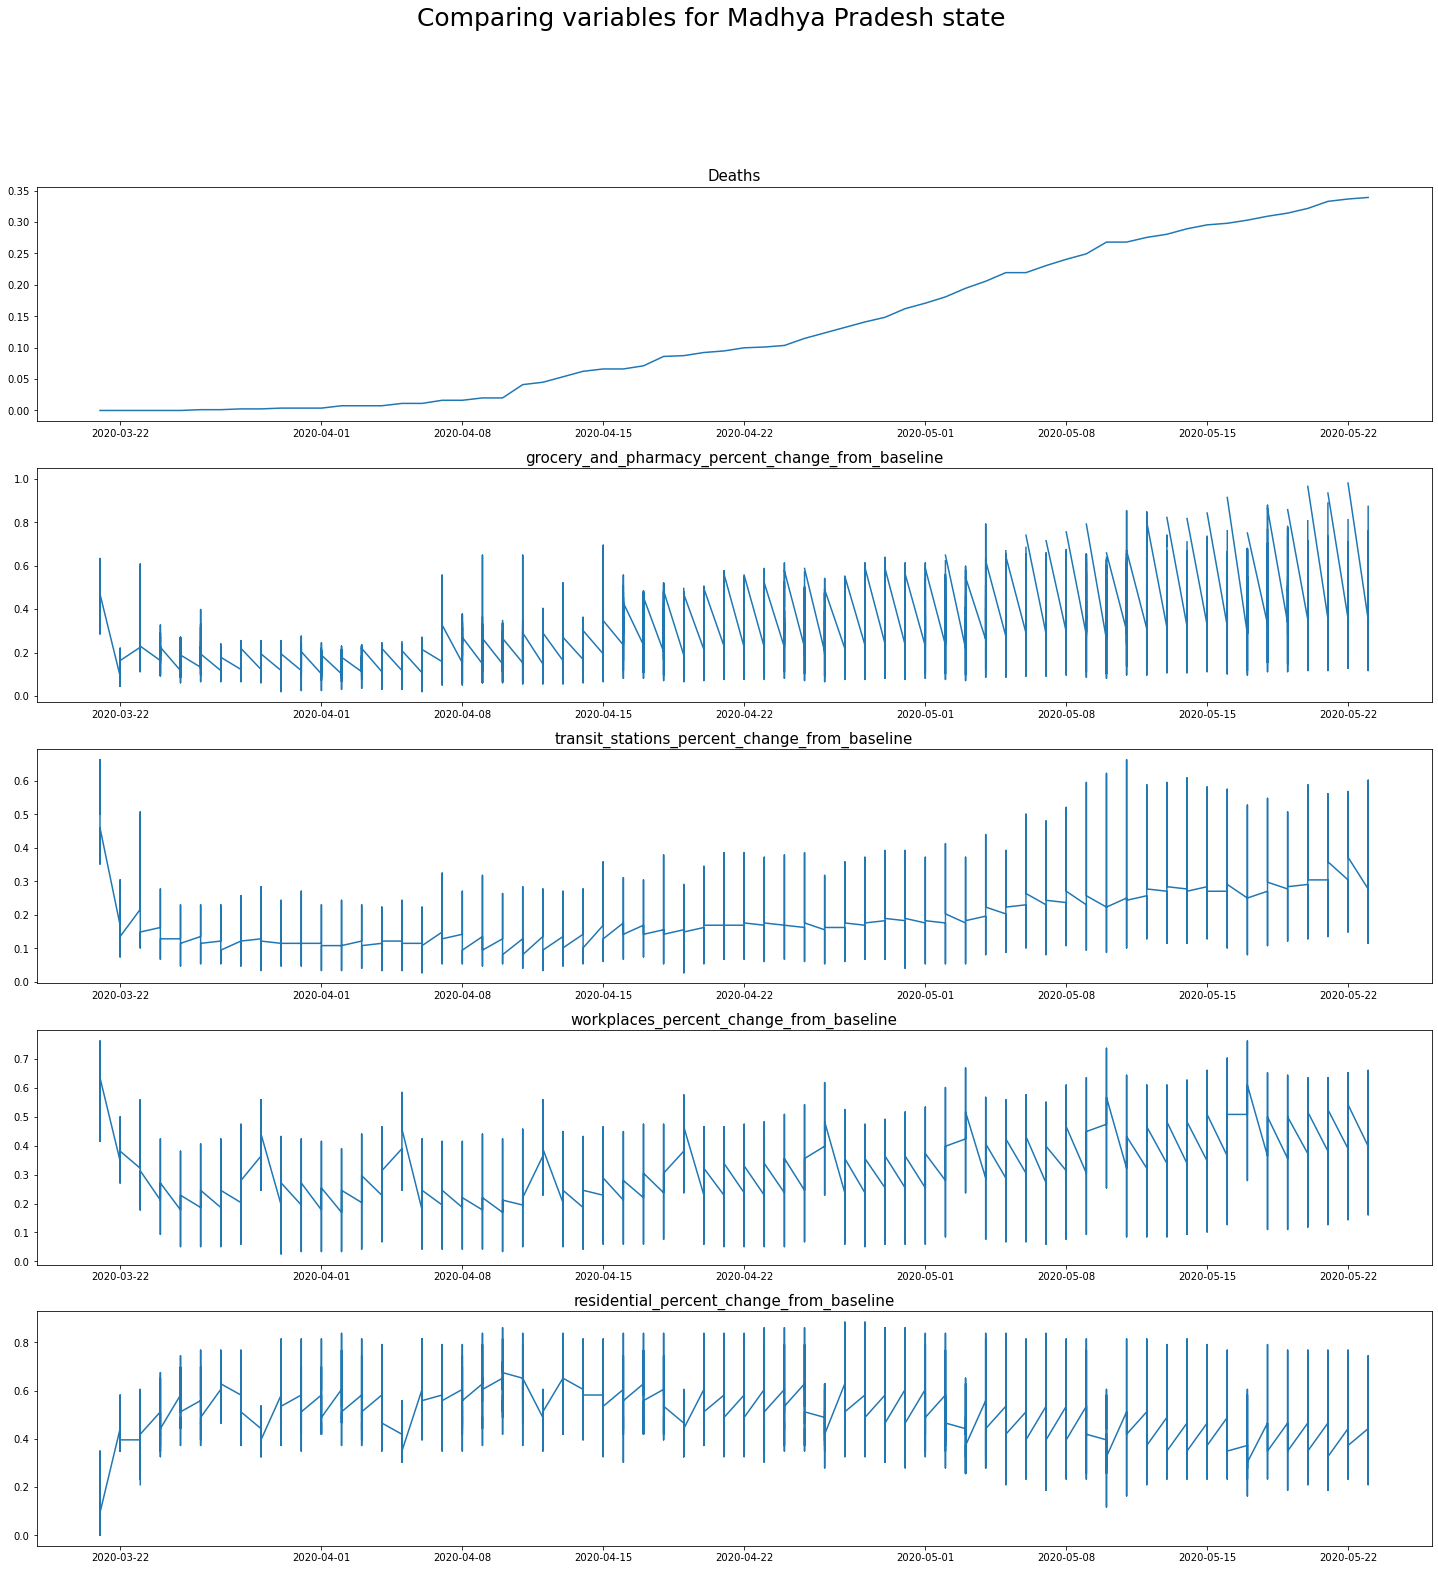

In [115]:
Madhya_Pradesh = normalized_df[normalized_df['State']=='Madhya Pradesh']

fig, axs = plt.subplots(5, 1,figsize=(25,25))
for i in range(5):
    axs[i].plot(Madhya_Pradesh['Date'],Madhya_Pradesh[variable_interest[i]])
    axs[i].set_title('{}'.format(variable_interest[i]),fontsize=15)
plt.suptitle('Comparing variables for Madhya Pradesh state',fontsize=25)

Text(0.5, 0.98, 'Comparing variables for Chandigarh state')

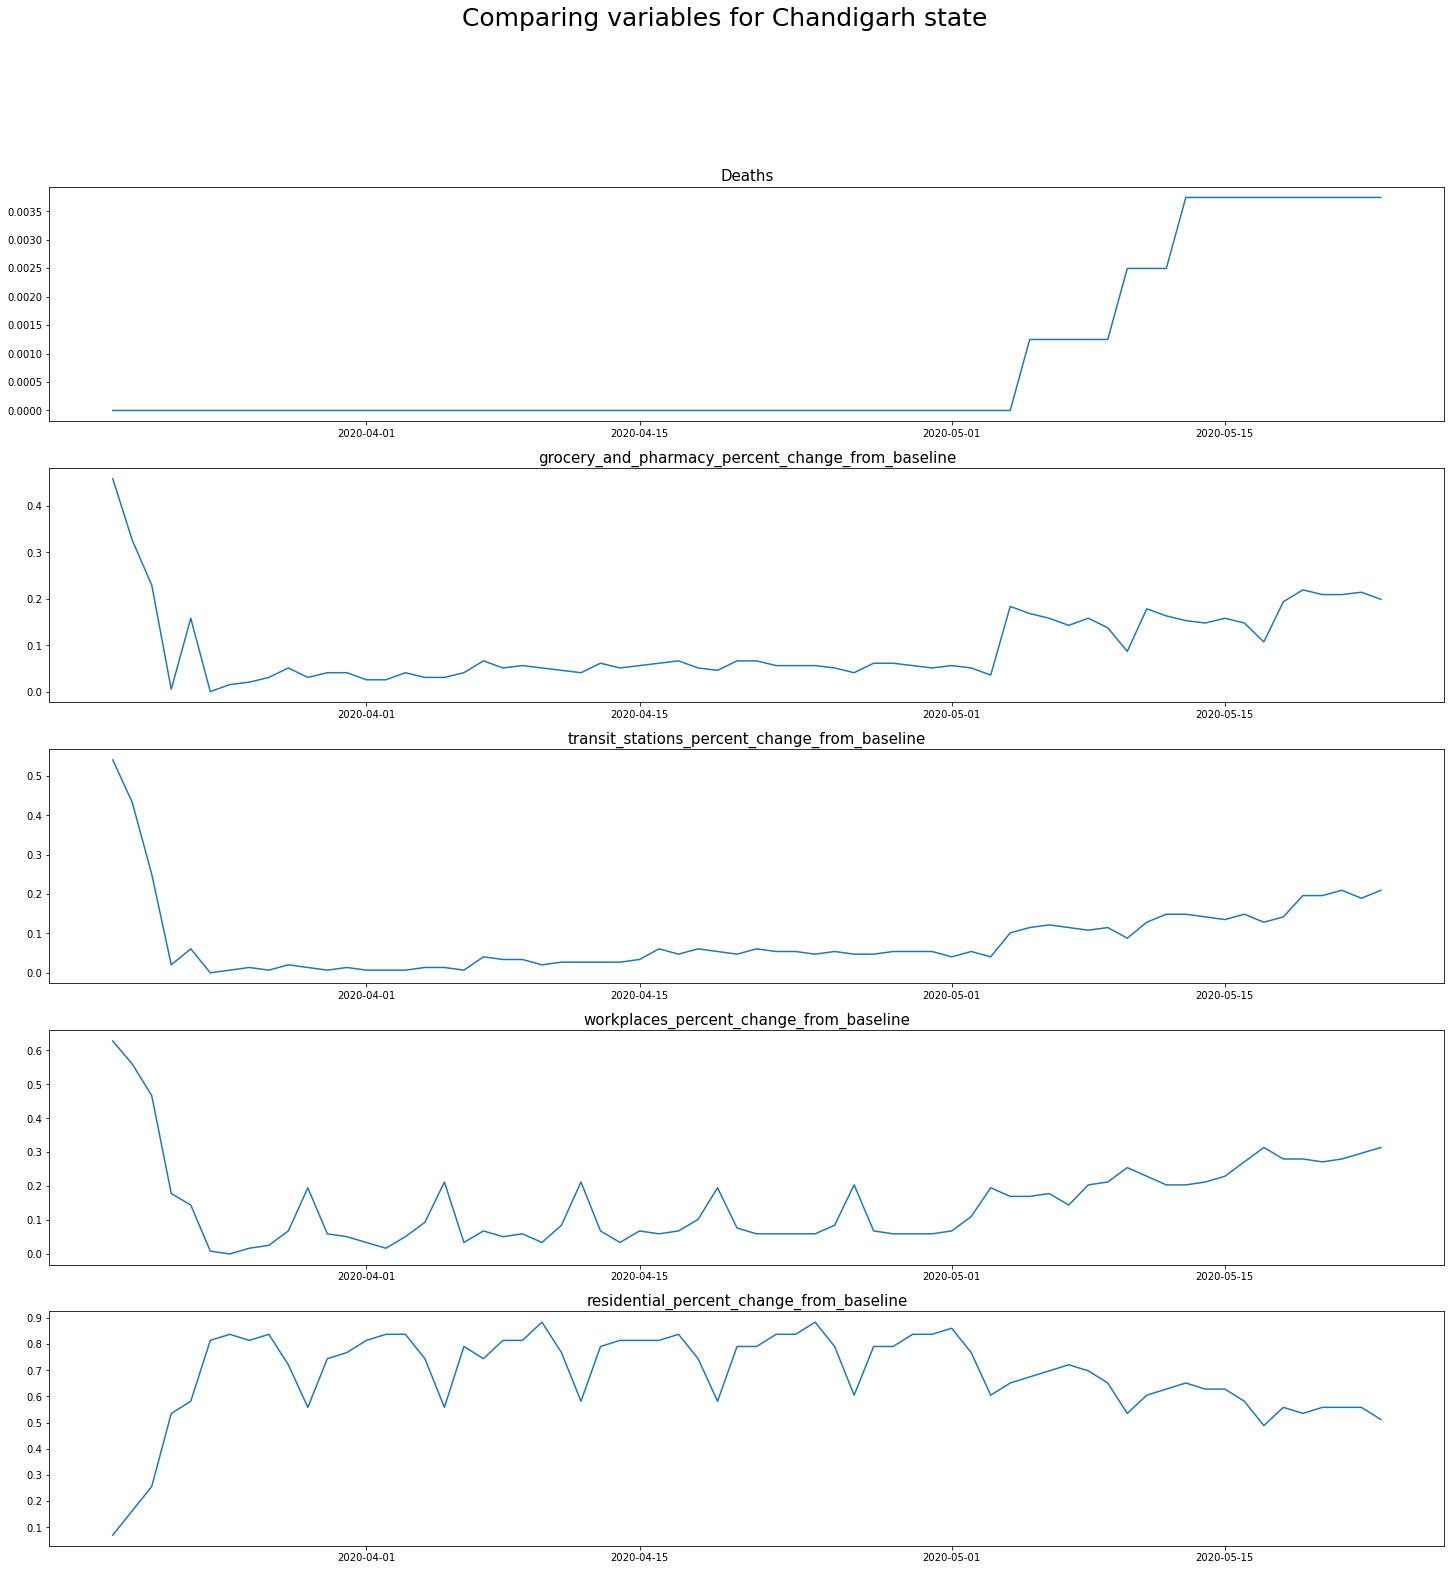

In [116]:
Chandigarh = normalized_df[normalized_df['State']=='Chandigarh']

fig, axs = plt.subplots(5, 1,figsize=(25,25))
for i in range(5):
    axs[i].plot(Chandigarh['Date'],Chandigarh[variable_interest[i]])
    axs[i].set_title('{}'.format(variable_interest[i]),fontsize=15)
plt.suptitle('Comparing variables for Chandigarh state',fontsize=25)

# Webscraping to get new dataset:

## Now we want to get some more additional information about Indian Provinces. To get the dataset we used BeautifulSoup modul and obtained a table that shows some generic data about provincec. These variables are such as: Area, Population, Rural Population, Urban Population and so on.

In [117]:
test = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population')

In [118]:
# Retrieve data usng web scraping to group each province by geographical orientation 
from bs4  import BeautifulSoup
import requests
import urllib3

In [119]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population'
req = requests.get(url)
soup = BeautifulSoup(req.text,'html.parser')

# Headers:
table_header = soup.find_all('th')
headers = []
for header in table_header:
    headers.append(header.text)
headers = headers[1:]

# Trimming the header names:
new_header = []
for h in headers:
    new_header.append(h[:h.index('\n')])
new_header

# Getting table contents
table_content = soup.find_all('td')
table = []
for content in table_content:
    table.append(content.text)

table = table[3:]
tables = []
for element in table:
    tables.append(element.strip())

In [120]:
data_frame = []
i = 0
while i <= 432:
    sub = tables[i:i+12]
    data_frame.append(sub)
    i += 12

In [121]:
df = pd.DataFrame(data_frame,columns=new_header)
df.rename(columns={'State or union territory':'State'},inplace=True)
df['State'] = df['State'].replace(['Manipur[d]','NCT of Delhi'],['Manipur','Delhi'])

In [122]:
grouped_df = new_df.groupby('State').sum()

In [123]:
generic_df = pd.merge(df,grouped_df,on=['State'])

In [124]:
generic_df['Percent rural'] = generic_df['Percent rural'].str.rstrip('%').astype('float') / 100.0
generic_df['Percent urban'] = generic_df['Percent urban'].str.rstrip('%').astype('float') / 100.0

<a name="Ratio"></a>

### Relationship between Covid cases and ration of urban and rural population

#### We run correlation method to see if there is a relationship between the Death numbers caused by Covid-19 and the ratio of urban and rural population:

In [125]:
print(generic_df['Deaths'].corr(generic_df['Percent rural']))
print(generic_df['Deaths'].corr(generic_df['Percent urban']/generic_df['Percent rural']))

0.2451213008457431
-0.5543780863177514


The correlation range showe where there is a positive relationship, this relationship is not significant enough, but in negative correlation, there a strong negative correlation between the ratio of urban/rural population and number of deaths caused by Covid-19

In [126]:
test_df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0
...,...,...,...,...,...
14788,2020-08-16,West Bengal,1314772.0,1198274.0,116498.0
14789,2020-08-17,West Bengal,1347091.0,1227513.0,119578.0
14790,2020-08-18,West Bengal,1382198.0,1259445.0,122753.0
14793,2020-08-21,West Bengal,1487844.0,1355480.0,132364.0


# Adding df to test_df to get the total vaccination information per capita 

## Dropping the row where state is India and shows the total numbers

## Merging df with grouped by test_df on State

In [127]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 14794
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8737 non-null   object 
 1   State         8737 non-null   object 
 2   TotalSamples  8737 non-null   float64
 3   Negative      8737 non-null   float64
 4   Positive      8737 non-null   float64
dtypes: float64(3), object(2)
memory usage: 409.5+ KB


In [128]:
grouped_test = test_df.groupby('State')[['TotalSamples','Negative','Positive']].max().sort_values(
    'TotalSamples',ascending=False).reset_index()

new_test_df = grouped_test.merge(df)

In [129]:
new_test_df.head(10)

,State,TotalSamples,Negative,Positive,Rank,Population,National Share (%),Decadal growth(2001–2012),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio
0,Uttar Pradesh,58111746.0,58111746.0,126722.0,1,"199,812,341",,20.2%,"155,317,278",77.73%,"44,495,063",22.27%,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,Andhra Pradesh,22524187.0,22524187.0,235525.0,10,"49,577,103[b]",4.1%,11.0%,"34,966,693",70.53%,"14,610,410",29.47%,"162,968 km2 (62,922 sq mi)",303/km2 (780/sq mi),993
2,Jammu and Kashmir,10314088.0,10314088.0,31371.0,UT2,"12,267,032",1.01%,23.6%,"9,064,220",73.89%,"3,202,812",26.11%,"42,241 km2 (16,309 sq mi)[c]",297/km2 (770/sq mi),890
3,Jharkhand,10298110.0,9952072.0,346038.0,14,"32,988,134",2.73%,22.4%,"25,055,073",75.95%,"7,933,061",24.05%,"79,714 km2 (30,778 sq mi)","414/km2 (1,070/sq mi)",948
4,Kerala,9659492.0,8726853.0,932639.0,13,"33,406,061",2.76%,4.9%,"17,471,135",52.3%,"15,934,926",47.7%,"38,863 km2 (15,005 sq mi)","859/km2 (2,220/sq mi)","1,084"
5,Madhya Pradesh,9148503.0,9148503.0,50640.0,5,"72,626,809",6%,16.3%,"52,557,404",72.37%,"20,069,405",27.63%,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
6,Maharashtra,8548036.0,6909075.0,1638961.0,2,"112,374,333",9.28%,20.0%,"61,556,074",54.78%,"50,818,259",45.22%,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
7,Haryana,5913873.0,5877255.0,275137.0,18,"25,351,462",2.09%,19.9%,"16,509,359",65.12%,"8,842,103",34.88%,"44,212 km2 (17,070 sq mi)","573/km2 (1,480/sq mi)",879
8,Uttarakhand,5677464.0,5677464.0,14083.0,19,"10,086,292",0.83%,18.8%,"7,036,954",69.77%,"3,049,338",30.23%,"53,483 km2 (20,650 sq mi)",189/km2 (490/sq mi),963
9,Rajasthan,5173485.0,5173485.0,67954.0,7,"68,548,437",5.66%,21.3%,"51,500,352",75.13%,"17,048,085",24.87%,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928


In [130]:
new_test_df.replace(new_test_df.iloc[1]['Population'],'49,577,103',inplace=True)

#### Converting Population colun to numeric

In [131]:
def string_to_int(x):
    string = ''
    return int(string.join(x.split(',')))

new_test_df['Population'] = new_test_df['Population'].map(lambda x: string_to_int(x))

In [132]:
# Getting per_capita columns:
new_test_df['TotalSamples_per_capita'] = new_test_df['TotalSamples']/new_test_df['Population']
new_test_df['Negative_per_capita'] = new_test_df['Negative']/new_test_df['Population']
new_test_df['Positive_per_capita'] = new_test_df['Positive']/new_test_df['Population']

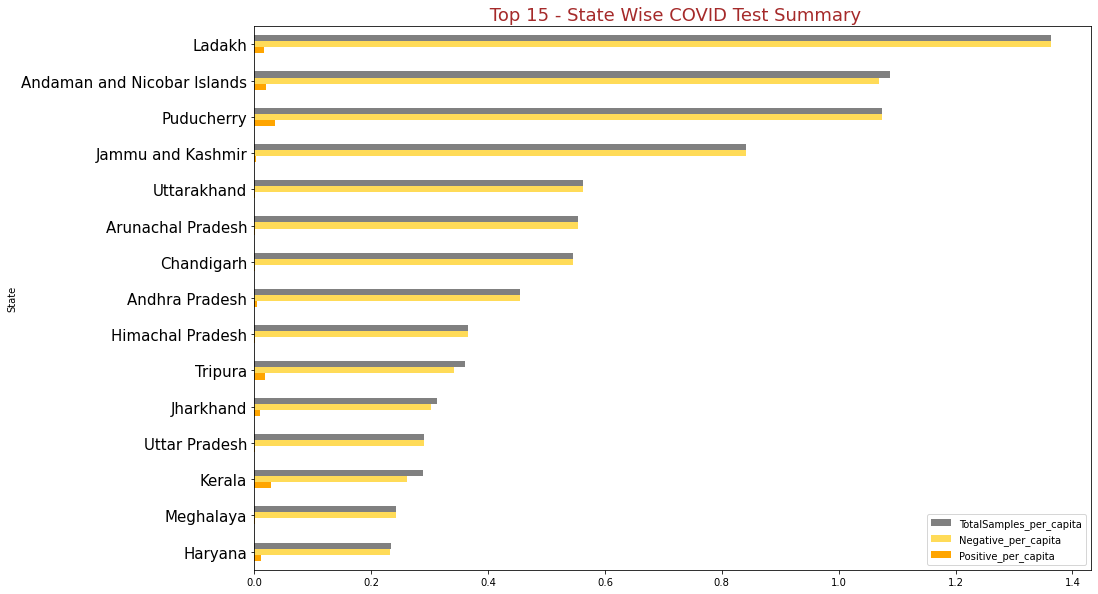

In [133]:
new_test_df[['State','TotalSamples_per_capita','Negative_per_capita','Positive_per_capita']].sort_values(
    'TotalSamples_per_capita',ascending=False).set_index('State').head(15).plot.barh(
    figsize = (15,10), rot = 0,color = ("grey","#FFDB58","orange")).invert_yaxis()
plt.title(" Top 15 - State Wise COVID Test Summary", fontsize = 18, color = 'Brown')
plt.yticks(fontsize=15)
plt.show()

## Top 15 States - Highest Positive Rate

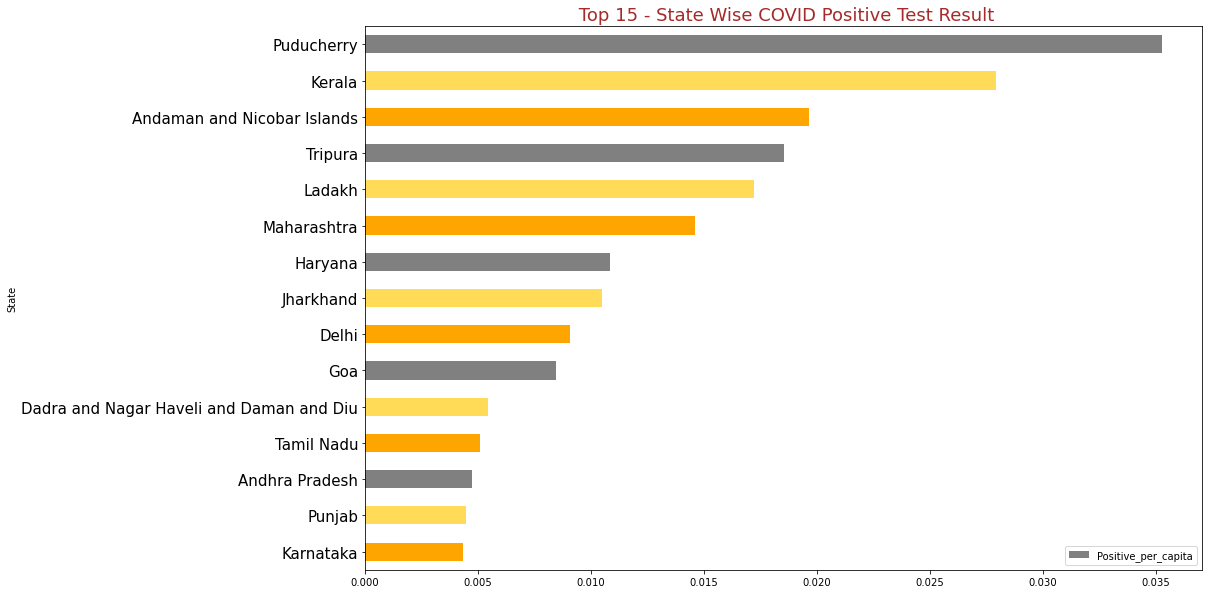

In [136]:
new_test_df[['State','Positive_per_capita']].sort_values(
    'Positive_per_capita',ascending=False).set_index('State').head(15).plot.barh(
    figsize = (15,10), rot = 0,color = ("grey","#FFDB58","orange")).invert_yaxis()
plt.title(" Top 15 - State Wise COVID Positive Test Result", fontsize = 18, color = 'Brown')
plt.yticks(fontsize=15)
plt.show()


We can see that the states with the highest rate of test samplings and also positive results varried. These barplots are more reliable since we considered the population in each individual state and calculated samples and either positive or negative results per capita in each provice

In [137]:
grouped_vaccine = vaccine_df.groupby('State')[['Date','Total Doses Administered','Male(Individuals Vaccinated)'
                                               ,'Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)',
                                              'Total CoviShield Administered','Total Covaxin Administered']].max().sort_values(
    'Total Doses Administered',ascending=False).reset_index()

new_vaccine_df = df.merge(grouped_vaccine)

new_vaccine_df.head()

,Rank,State,Population,National Share (%),Decadal growth(2001–2012),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Date,Total Doses Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total CoviShield Administered,Total Covaxin Administered
0,1,Uttar Pradesh,"199,812,341",,20.2%,"155,317,278",77.73%,"44,495,063",22.27%,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,2021-07-15,34513734.0,19811048.0,14693569.0,9117.0,30445181.0,4066926.0
1,2,Maharashtra,"112,374,333",9.28%,20.0%,"61,556,074",54.78%,"50,818,259",45.22%,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,2021-07-15,34802542.0,18892329.0,15905165.0,5048.0,30639749.0,4152619.0
2,3,Bihar,"104,099,452",8.6%,25.4%,"92,341,436",88.71%,"11,758,016",11.29%,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,2021-07-15,17526845.0,9607873.0,7915722.0,3250.0,15628446.0,1897811.0
3,4,West Bengal,"91,276,115",7.54%,13.8%,"62,183,113",68.13%,"29,093,002",31.87%,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,2021-07-15,23205213.0,12896789.0,10305169.0,3255.0,20293503.0,2904258.0
4,5,Madhya Pradesh,"72,626,809",6%,16.3%,"52,557,404",72.37%,"20,069,405",27.63%,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,2021-07-15,22028495.0,12265543.0,9759137.0,3815.0,19138218.0,2889904.0


In [138]:
def getMonth(date):
    return(date.strftime('%b'))

def getYear(date):
    return(date.strftime('%Y'))

new_vaccine_df['Month']=new_vaccine_df['Date'].apply(getMonth)
new_vaccine_df['Year']=new_vaccine_df['Date'].apply(getYear)
new_vaccine_df['Month_year'] = new_vaccine_df['Month'].map(str) +' ' + new_vaccine_df['Year']

new_vaccine_df.head(10)

,Rank,State,Population,National Share (%),Decadal growth(2001–2012),Rural population,Percent rural,Urban population,Percent urban,Area[16],...,Date,Total Doses Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total CoviShield Administered,Total Covaxin Administered,Month,Year,Month_year
0,1,Uttar Pradesh,"199,812,341",,20.2%,"155,317,278",77.73%,"44,495,063",22.27%,"240,928 km2 (93,023 sq mi)",...,2021-07-15,34513734.0,19811048.0,14693569.0,9117.0,30445181.0,4066926.0,Jul,2021,Jul 2021
1,2,Maharashtra,"112,374,333",9.28%,20.0%,"61,556,074",54.78%,"50,818,259",45.22%,"307,713 km2 (118,809 sq mi)",...,2021-07-15,34802542.0,18892329.0,15905165.0,5048.0,30639749.0,4152619.0,Jul,2021,Jul 2021
2,3,Bihar,"104,099,452",8.6%,25.4%,"92,341,436",88.71%,"11,758,016",11.29%,"94,163 km2 (36,357 sq mi)",...,2021-07-15,17526845.0,9607873.0,7915722.0,3250.0,15628446.0,1897811.0,Jul,2021,Jul 2021
3,4,West Bengal,"91,276,115",7.54%,13.8%,"62,183,113",68.13%,"29,093,002",31.87%,"88,752 km2 (34,267 sq mi)",...,2021-07-15,23205213.0,12896789.0,10305169.0,3255.0,20293503.0,2904258.0,Jul,2021,Jul 2021
4,5,Madhya Pradesh,"72,626,809",6%,16.3%,"52,557,404",72.37%,"20,069,405",27.63%,"308,245 km2 (119,014 sq mi)",...,2021-07-15,22028495.0,12265543.0,9759137.0,3815.0,19138218.0,2889904.0,Jul,2021,Jul 2021
5,6,Tamil Nadu,"72,147,030",5.96%,15.6%,"37,229,590",51.6%,"34,917,440",48.4%,"130,051 km2 (50,213 sq mi)",...,2021-07-15,17017222.0,9038014.0,7976534.0,2674.0,14293847.0,2720133.0,Jul,2021,Jul 2021
6,7,Rajasthan,"68,548,437",5.66%,21.3%,"51,500,352",75.13%,"17,048,085",24.87%,"342,239 km2 (132,139 sq mi)",...,2021-07-15,25848234.0,13765951.0,12078009.0,4274.0,22892419.0,2953595.0,Jul,2021,Jul 2021
7,8,Karnataka,"61,095,297",5.05%,15.6%,"30,069,335",49.22%,"31,025,962",50.78%,"191,791 km2 (74,051 sq mi)",...,2021-07-15,24477242.0,12419827.0,12053357.0,4058.0,21390621.0,3077523.0,Jul,2021,Jul 2021
8,9,Gujarat,"60,439,692",4.99%,19.3%,"34,694,609",57.4%,"25,745,083",42.6%,"196,024 km2 (75,685 sq mi)",...,2021-07-15,27331752.0,14862377.0,12465349.0,4026.0,24140851.0,3189898.0,Jul,2021,Jul 2021
9,10,Andhra Pradesh,"49,577,103[b]",4.1%,11.0%,"34,966,693",70.53%,"14,610,410",29.47%,"162,968 km2 (62,922 sq mi)",...,2021-07-15,16633924.0,7555484.0,9075840.0,2600.0,13846543.0,2771300.0,Jul,2021,Jul 2021


In [139]:
new_vaccine_df.replace(new_vaccine_df.iloc[9]['Population'],'49,577,103',inplace=True)
new_vaccine_df['Population'] = new_vaccine_df['Population'].map(lambda x: string_to_int(x))

In [140]:
# Getting per_capita columns:
new_vaccine_df['Total Doses Administered_per_capita'] = new_vaccine_df['Total Doses Administered']/new_vaccine_df['Population']
new_vaccine_df['Total CoviShield Administered_capita'] = new_vaccine_df['Total CoviShield Administered']/new_vaccine_df['Population']
new_vaccine_df['Total Covaxin Administered_capita'] = new_vaccine_df['Total Covaxin Administered']/new_vaccine_df['Population']

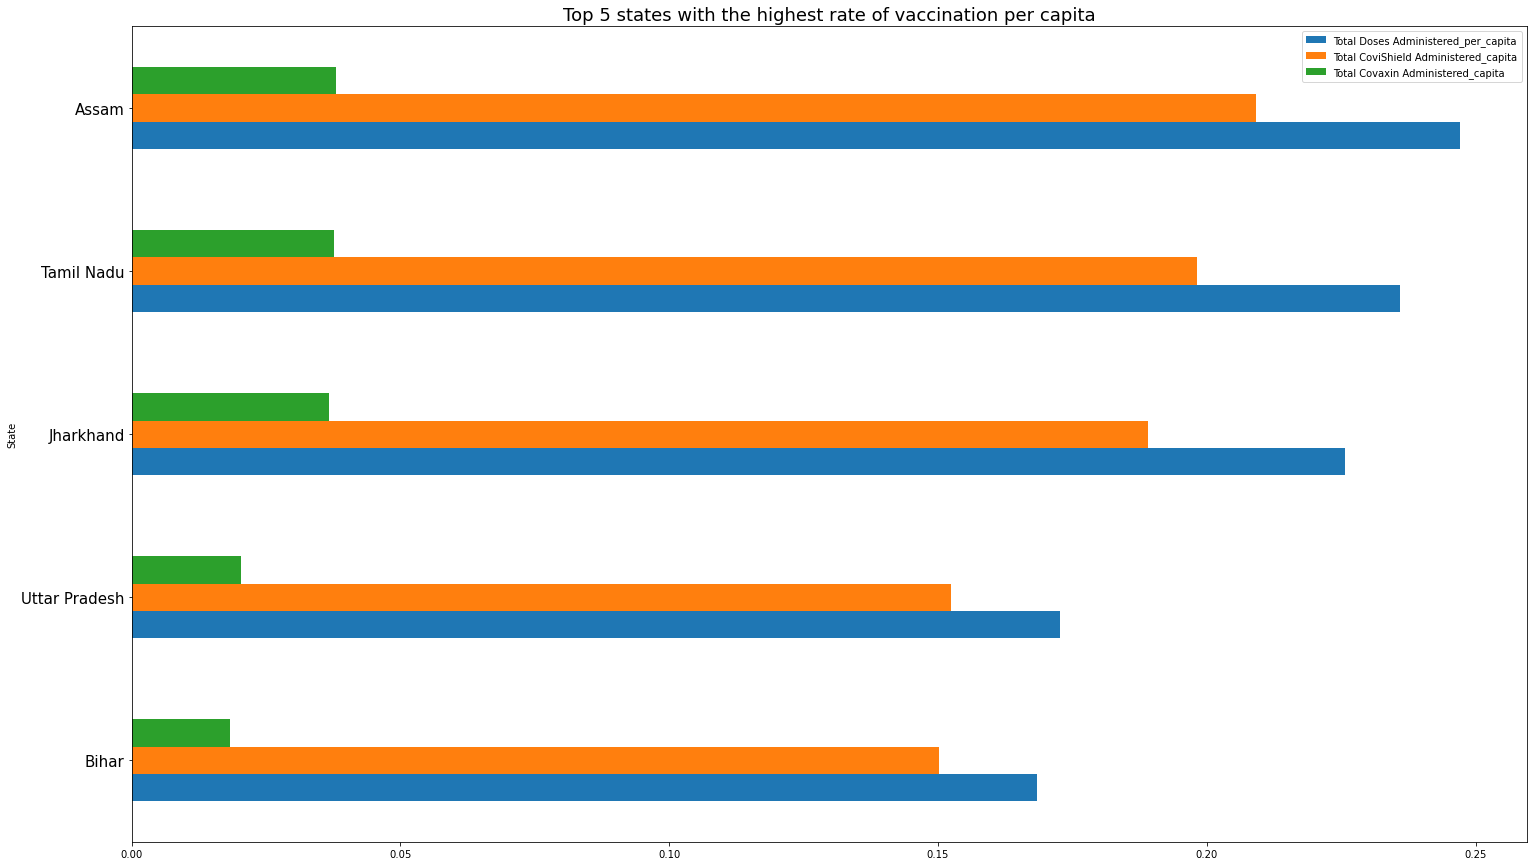

In [141]:
new_vaccine_df[['State','Total Doses Administered_per_capita','Total CoviShield Administered_capita','Total Covaxin Administered_capita']].set_index('State').sort_values('Total Doses Administered_per_capita')[:5].plot.barh(figsize=(25,15))
plt.yticks(fontsize=15)
plt.title('Top 5 states with the highest rate of vaccination per capita',fontsize=18)
plt.show()

Running all the above evaluations considering per capita in each state, shows the importance of contemplating the ratio of ppulation in each state

#                                                     Thank You!  

# <center>The End</center>